**TELECOM CHURN CASE STUDY**

- Submited By:
    1. Suel
    2. Ujwal 
    3. Raveena
    4. Syed Jahangir
    
 **METHODOLOGY ADOPTED**

 1. Reading and Cleaning of Dataset
 2. Identify churners
 3. Identigy High Revenue Customers
 4. EDA - Uni Variate and Bi-Variate
 5. Model building
   -   5.1 Reduce the dataset dimentionality.
   -  5.2 Handle Class imbalance
   -   5.3 Evaluate models using appropriate metrics
   -   5.4 Choose a model based on aforemntioned metrics
   -   5.5 Identify significant predictor attributes - Used logistic model
 6. Make recommendations based on our findings 

In [0]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Read the dataset
tele = pd.read_csv('C:/Users/Dell/Desktop/DaTa Science/IIITB/Python/telecom churn assignment/telecom_churn_data.csv',delimiter= ',', encoding='ISO-8859-1')
tele.head(2)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.2,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.0,0.00


In [0]:
print(tele.info(), '\n' , tele.shape ,'\n', tele.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None 
 (99999, 226) 
        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              

In [0]:
tele.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [0]:
#drpping these columns because of low variance
tele.drop(columns = ['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'], inplace = True)
tele.shape

(99999, 222)

In [0]:
#replacing the lst date of month to calculate the time from last recharge later
tele.last_date_of_month_7.fillna(value = '7/31/2014' , inplace = True)
tele.last_date_of_month_8.fillna(value = '8/31/2014' , inplace = True)
tele.last_date_of_month_9.fillna(value = '9/30/2014' , inplace = True)

In [0]:
tele.isnull().sum().sort_values(ascending = False) / len(tele.index) * 100

arpu_3g_6                   74.846748
max_rech_data_6             74.846748
av_rech_amt_data_6          74.846748
night_pck_user_6            74.846748
count_rech_3g_6             74.846748
total_rech_data_6           74.846748
fb_user_6                   74.846748
arpu_2g_6                   74.846748
count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
total_rech_data_7           74.428744
arpu_2g_7                   74.428744
arpu_3g_7                   74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
av_rech_amt_data_7          74.428744
count_rech_3g_7             74.428744
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
count_rech_2g_9             74.077741
av_rech_amt_data_9          74.077741
arpu_2g_9                   74.077741
count_rech_3g_9             74.077741
night_pck_us

**Our usage wise variables have null values in range from 0 - 7 % whereas revenue based parameters have null values in 73 % of data rows.**

**We have two options**

    - first wheter to delete the values
    - second wheter to impute the values
         -   for imputing the values, we can use KNN method >> but it is computationally intensive
         -   mean, mode and median based imputing

In [0]:
#Dropping max recharge parameters, because i think it is not that useful for further analysis
tele.drop(columns = ['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9'], inplace = True)

In [0]:
tele.isnull().sum().sort_values(ascending = False) / len(tele.index) * 100

count_rech_3g_6             74.846748
fb_user_6                   74.846748
night_pck_user_6            74.846748
date_of_last_rech_data_6    74.846748
arpu_3g_6                   74.846748
total_rech_data_6           74.846748
count_rech_2g_6             74.846748
arpu_2g_6                   74.846748
av_rech_amt_data_6          74.846748
fb_user_7                   74.428744
date_of_last_rech_data_7    74.428744
count_rech_3g_7             74.428744
count_rech_2g_7             74.428744
night_pck_user_7            74.428744
arpu_2g_7                   74.428744
total_rech_data_7           74.428744
av_rech_amt_data_7          74.428744
arpu_3g_7                   74.428744
arpu_2g_9                   74.077741
count_rech_2g_9             74.077741
night_pck_user_9            74.077741
arpu_3g_9                   74.077741
count_rech_3g_9             74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
total_rech_data_9           74.077741
av_rech_amt_

In [0]:
# nigh pack users and fb users seems to be categorical in nature, checking this hypothesis
print(tele.night_pck_user_6.value_counts())
print(tele.night_pck_user_7.value_counts())
print(tele.night_pck_user_8.value_counts())
print(tele.night_pck_user_9.value_counts())

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64
0.0    24982
1.0      589
Name: night_pck_user_7, dtype: int64
0.0    25790
1.0      549
Name: night_pck_user_8, dtype: int64
0.0    25508
1.0      414
Name: night_pck_user_9, dtype: int64


In [0]:
#creating a new category for missing values, 2, because deleting the null values might result in loss in information
# 0  - No , 1 - Yes, 2 - New class
tele.night_pck_user_6.fillna(value = 2 , inplace = True)
tele.night_pck_user_7.fillna(value = 2 , inplace = True)
tele.night_pck_user_8.fillna(value = 2 , inplace = True)
tele.night_pck_user_9.fillna(value = 2 , inplace = True)


tele.fb_user_6.fillna(value = 2 , inplace = True)
tele.fb_user_7.fillna(value = 2 , inplace = True)
tele.fb_user_8.fillna(value = 2 , inplace = True)
tele.fb_user_9.fillna(value = 2 , inplace = True)

In [0]:
# High missing values (73 - 74 %) in date of last recharge for data implicate that the user didn't really recharged for 2g or 3g data.
# therefore, we can safely assume that total recharge for data for that particular month is zero.
tele.total_rech_data_6.fillna(value = 0 , inplace = True)
tele.total_rech_data_7.fillna(value = 0 , inplace = True)
tele.total_rech_data_8.fillna(value = 0 , inplace = True)
tele.total_rech_data_9.fillna(value = 0 , inplace = True)

#Similarly  average recharge amount 
tele.av_rech_amt_data_6.fillna(value = 0 , inplace = True)
tele.av_rech_amt_data_7.fillna(value = 0 , inplace = True)
tele.av_rech_amt_data_8.fillna(value = 0 , inplace = True)
tele.av_rech_amt_data_9.fillna(value = 0 , inplace = True)

In [0]:
tele.isnull().sum().sort_values(ascending = False) / len(tele.index) * 100

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
arpu_2g_6                   74.846748
count_rech_3g_6             74.846748
arpu_3g_6                   74.846748
count_rech_3g_7             74.428744
date_of_last_rech_data_7    74.428744
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
arpu_2g_7                   74.428744
count_rech_3g_9             74.077741
arpu_2g_9                   74.077741
date_of_last_rech_data_9    74.077741
count_rech_2g_9             74.077741
arpu_3g_9                   74.077741
count_rech_3g_8             73.660737
arpu_2g_8                   73.660737
count_rech_2g_8             73.660737
arpu_3g_8                   73.660737
date_of_last_rech_data_8    73.660737
isd_ic_mou_9                 7.745077
loc_og_t2m_mou_9             7.745077
loc_og_t2f_mou_9             7.745077
spl_ic_mou_9                 7.745077
std_og_t2f_mou_9             7.745077
std_og_t2c_mou_9             7.745077
std_ic_mou_9

In [0]:
#since average (2g+3g) has been imputed with zero. We can go ahead and delete arpu (2g+3g) and count of recharge(2g+3g)
#because total = average * count and since total and average are zero, it doesn't matter the count
col = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
tele.drop(columns = col ,inplace = True)

In [0]:
tele.isnull().sum().sort_values(ascending = False) / len(tele.index) * 100

count_rech_3g_6       74.846748
count_rech_3g_7       74.428744
count_rech_3g_9       74.077741
count_rech_3g_8       73.660737
std_ic_t2t_mou_9       7.745077
roam_og_mou_9          7.745077
loc_og_t2t_mou_9       7.745077
loc_ic_mou_9           7.745077
loc_og_t2m_mou_9       7.745077
loc_og_t2f_mou_9       7.745077
spl_ic_mou_9           7.745077
loc_og_t2c_mou_9       7.745077
std_ic_t2m_mou_9       7.745077
loc_og_mou_9           7.745077
std_ic_t2f_mou_9       7.745077
std_og_t2t_mou_9       7.745077
std_ic_t2o_mou_9       7.745077
std_og_t2m_mou_9       7.745077
std_ic_mou_9           7.745077
std_og_t2f_mou_9       7.745077
ic_others_9            7.745077
std_og_t2c_mou_9       7.745077
isd_ic_mou_9           7.745077
loc_ic_t2f_mou_9       7.745077
std_og_mou_9           7.745077
loc_ic_t2m_mou_9       7.745077
isd_og_mou_9           7.745077
spl_og_mou_9           7.745077
onnet_mou_9            7.745077
roam_ic_mou_9          7.745077
                        ...    
total_re

In [0]:
tele.drop(columns = ['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9'], inplace = True)

In [0]:
df = tele.isnull().sum().sort_values(ascending = False) / len(tele.index) * 100
df[df>0]

loc_ic_t2m_mou_9       7.745077
std_og_t2f_mou_9       7.745077
spl_ic_mou_9           7.745077
loc_ic_mou_9           7.745077
isd_ic_mou_9           7.745077
roam_og_mou_9          7.745077
ic_others_9            7.745077
loc_og_t2t_mou_9       7.745077
loc_ic_t2t_mou_9       7.745077
offnet_mou_9           7.745077
loc_og_t2m_mou_9       7.745077
std_og_t2m_mou_9       7.745077
loc_ic_t2f_mou_9       7.745077
loc_og_t2f_mou_9       7.745077
std_og_t2t_mou_9       7.745077
loc_og_t2c_mou_9       7.745077
std_og_t2c_mou_9       7.745077
roam_ic_mou_9          7.745077
std_og_mou_9           7.745077
std_ic_t2o_mou_9       7.745077
std_ic_t2m_mou_9       7.745077
spl_og_mou_9           7.745077
std_ic_t2f_mou_9       7.745077
std_ic_t2t_mou_9       7.745077
og_others_9            7.745077
isd_og_mou_9           7.745077
loc_og_mou_9           7.745077
onnet_mou_9            7.745077
std_ic_mou_9           7.745077
ic_others_8            5.378054
                         ...   
loc_ic_m

In [0]:
#summing the revenue of month 6 and 7
tele['rev_per_user_6_7'] = round(tele.total_rech_amt_6+(tele.total_rech_data_6 * tele.av_rech_amt_data_6) + tele.total_rech_amt_7+(tele.total_rech_data_7 * tele.av_rech_amt_data_7),2)
tele.drop(columns = ['total_rech_amt_6','total_rech_data_6','av_rech_amt_data_6','total_rech_amt_7','total_rech_data_7','av_rech_amt_data_7'], inplace = True)
tele.shape

(99999, 193)

In [0]:
(tele['rev_per_user_6_7']).describe()

count     99999.000000
mean        970.656135
std        1738.847187
min           0.000000
25%         256.000000
50%         550.000000
75%        1106.000000
max      122472.000000
Name: rev_per_user_6_7, dtype: float64

In [0]:
#calculating the 70th percentile
high_value_customer = np.percentile(tele.rev_per_user_6_7,70)
print('The 70th percentile is : ' , high_value_customer)

The 70th percentile is :  956.0


In [0]:
tele = tele[tele.rev_per_user_6_7 > high_value_customer ]
tele.shape
#tele.head()

(29953, 193)

In [0]:
# Identify Churn
X = tele["total_ic_mou_9"] + tele["total_og_mou_9"] + tele["vol_2g_mb_9"] + tele["vol_3g_mb_9"]
tele["churn"] = np.where(X, 0, 1)
tele.churn.value_counts()

0    27520
1     2433
Name: churn, dtype: int64

In [0]:
list_of_columns = list(tele)

In [0]:
c = [a for a in list_of_columns if a.endswith('_9')]
c = c+['sep_vbc_3g'] 
tele.drop(columns = c , inplace = True)
tele.shape

(29953, 145)

In [0]:
tele.sample(5)

,mobile_number,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rev_per_user_6_7,churn
5990,7000222517,6/30/2014,7/31/2014,8/31/2014,249.092,580.259,445.661,108.61,266.36,99.84,...,0,0.0,0.0,0.0,251,0.0,0.00,0.0,1731.0,0
74123,7002023272,6/30/2014,7/31/2014,8/31/2014,658.311,618.690,679.112,132.06,103.88,97.83,...,0,2.0,2.0,2.0,2765,0.0,0.00,0.0,1595.0,0
2804,7000223310,6/30/2014,7/31/2014,8/31/2014,683.634,767.105,553.033,771.21,897.64,659.23,...,0,2.0,2.0,2.0,1484,0.0,0.00,0.0,1702.0,0
92545,7000770753,6/30/2014,7/31/2014,8/31/2014,256.405,627.581,661.780,66.11,285.79,345.71,...,0,2.0,2.0,2.0,268,0.0,0.00,0.0,1010.0,0
61563,7001699391,6/30/2014,7/31/2014,8/31/2014,131.447,362.913,0.000,0.00,0.00,0.00,...,0,1.0,1.0,2.0,1159,475.6,350.19,0.0,1592.0,0


In [0]:
tele.isnull().sum().sort_values(ascending = False) / len(tele.index) * 100

loc_ic_mou_8           3.912797
std_ic_t2o_mou_8       3.912797
loc_og_t2c_mou_8       3.912797
loc_og_mou_8           3.912797
std_og_t2t_mou_8       3.912797
std_og_t2m_mou_8       3.912797
ic_others_8            3.912797
std_og_mou_8           3.912797
spl_ic_mou_8           3.912797
std_og_t2f_mou_8       3.912797
std_ic_mou_8           3.912797
std_ic_t2f_mou_8       3.912797
loc_og_t2m_mou_8       3.912797
std_ic_t2m_mou_8       3.912797
std_ic_t2t_mou_8       3.912797
loc_ic_t2f_mou_8       3.912797
loc_ic_t2m_mou_8       3.912797
loc_ic_t2t_mou_8       3.912797
std_og_t2c_mou_8       3.912797
og_others_8            3.912797
spl_og_mou_8           3.912797
isd_og_mou_8           3.912797
loc_og_t2f_mou_8       3.912797
isd_ic_mou_8           3.912797
roam_ic_mou_8          3.912797
offnet_mou_8           3.912797
onnet_mou_8            3.912797
loc_og_t2t_mou_8       3.912797
roam_og_mou_8          3.912797
date_of_last_rech_8    1.943044
                         ...   
fb_user_

In [0]:
(tele.isnull().sum(axis = 1).sort_values(ascending = False) / len(tele.columns))*100

57525    61.379310
80932    61.379310
74778    61.379310
46858    61.379310
53460    61.379310
33018    61.379310
4190     61.379310
77106    60.689655
37867    60.689655
11626    60.689655
77071    60.689655
63834    60.689655
14191    60.689655
8975     60.689655
19971    60.689655
15473    60.689655
79523    60.689655
41406    60.689655
56125    60.689655
41228    60.689655
72112    60.689655
44474    60.689655
40855    60.689655
687      60.689655
48740    60.689655
75748    60.000000
22781    60.000000
76275    60.000000
21925    60.000000
76833    60.000000
           ...    
66109     0.000000
66034     0.000000
66029     0.000000
65956     0.000000
65987     0.000000
65960     0.000000
65963     0.000000
65966     0.000000
65972     0.000000
65975     0.000000
65977     0.000000
65978     0.000000
65980     0.000000
65981     0.000000
65983     0.000000
65986     0.000000
65989     0.000000
66028     0.000000
65995     0.000000
65998     0.000000
66000     0.000000
66001     0.

In [0]:
#dropiing the remaing null values, as it made no sense of imputing and replacing these values

tele.dropna( inplace = True)
tele.isnull().sum().sum() , tele.isnull().sum(axis = 1).sum() , tele.shape

(0, 0, (28119, 145))

In [0]:
tele['aon'] = tele.aon.apply(lambda x: round(x/365,2))
tele.aon.describe()

count    28119.000000
mean         3.379056
std          2.637440
min          0.490000
25%          1.290000
50%          2.400000
75%          4.960000
max         11.840000
Name: aon, dtype: float64

In [0]:
tele['date_of_last_rech_data_6'] = pd.to_datetime(tele.date_of_last_rech_6 )
tele['date_of_last_rech_data_7'] = pd.to_datetime(tele.date_of_last_rech_7 )
tele['date_of_last_rech_data_8'] = pd.to_datetime(tele.date_of_last_rech_8 )


tele['last_date_of_month_6'] = pd.to_datetime(tele.last_date_of_month_6)
tele['last_date_of_month_7'] = pd.to_datetime(tele.last_date_of_month_7)
tele['last_date_of_month_8'] = pd.to_datetime(tele.last_date_of_month_8)

In [0]:
tele['last_date_of_month_6'].sample(5)

24187   2014-06-30
27838   2014-06-30
65037   2014-06-30
55542   2014-06-30
27672   2014-06-30
Name: last_date_of_month_6, dtype: datetime64[ns]

In [0]:
tele['time_last_rec_6'] = ( tele['date_of_last_rech_data_6'] - tele['last_date_of_month_6'])
tele['time_last_rec_7'] = ( tele['date_of_last_rech_data_7'] - tele['last_date_of_month_7'])
tele['time_last_rec_8'] = ( tele['date_of_last_rech_data_8'] - tele['last_date_of_month_8']) 

In [0]:
tele.drop(columns = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], inplace = True)

In [0]:
tele['time_last_rec_6'] = tele['time_last_rec_6'].astype('timedelta64[D]')
tele['time_last_rec_7'] = tele['time_last_rec_7'].astype('timedelta64[D]')
tele['time_last_rec_8'] = tele['time_last_rec_8'].astype('timedelta64[D]')

In [0]:
tele[['time_last_rec_6','time_last_rec_7','time_last_rec_8']].describe()

,time_last_rec_6,time_last_rec_7,time_last_rec_8
count,28119.000000,28119.000000,28119.000000
mean,-3.341513,-3.450301,-4.137203
std,4.429199,4.245734,5.087591
min,-29.000000,-30.000000,-30.000000
25%,-4.000000,-5.000000,-6.000000
50%,-2.000000,-2.000000,-3.000000
75%,0.000000,0.000000,-1.000000
max,0.000000,0.000000,0.000000


In [0]:
tele.shape

(28119, 145)

## Univariate Analysis##

In [0]:
print(tele['rev_per_user_6_7'].sample(5))
print('*'*60)
print(tele['rev_per_user_6_7'].describe())

13840    3254.0
6833     1910.0
92525    1721.0
58430    1561.0
61573    1208.0
Name: rev_per_user_6_7, dtype: float64
************************************************************
count     28119.000000
mean       2317.278210
std        2742.059601
min         957.000000
25%        1212.000000
50%        1610.000000
75%        2428.000000
max      122472.000000
Name: rev_per_user_6_7, dtype: float64


<Figure size 720x360 with 0 Axes>

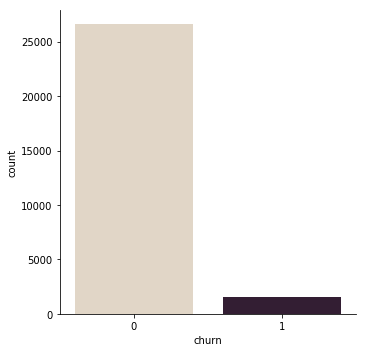

In [0]:
#picture of number of churners to no churneres
plt.figure(figsize=(10,5))
sns.catplot(x="churn", kind="count", palette="ch:.25", data=tele)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


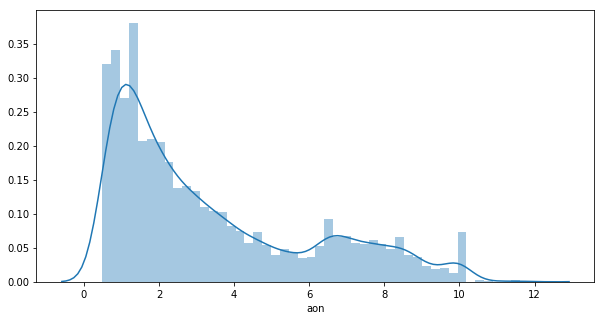

In [0]:
#distribution
plt.figure(figsize=(10,5))
sns.distplot(tele.aon , )

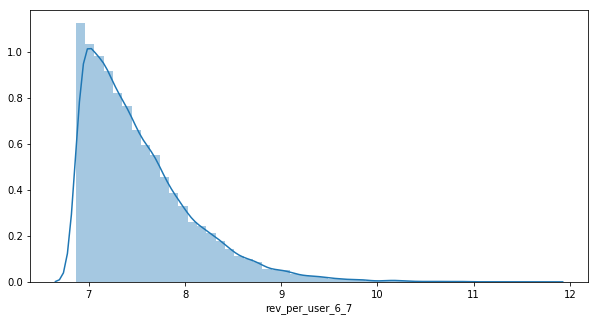

In [0]:
#distribuion plot for age on network for all users
#majority of users are in 7-8 years age bracket
plt.figure(figsize=(10,5))
sns.distplot(np.log(tele['rev_per_user_6_7']))

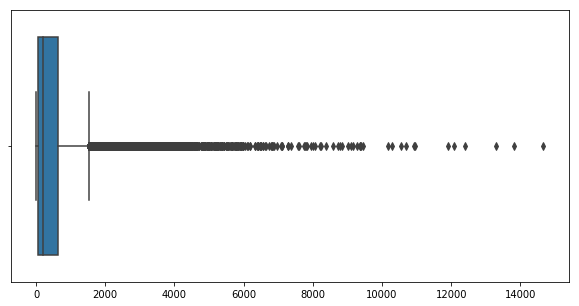

In [0]:
#plots for onnet usage for months 6,7 and 8
#its quite visible that usage decreases in month 8. irrespective of churn identity
plt.figure(figsize=(10,5))
sns.boxplot((tele['onnet_mou_6']+ tele['onnet_mou_7']))

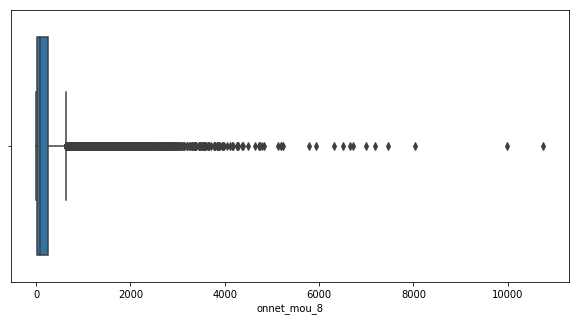

In [0]:
plt.figure(figsize=(10,5))
sns.boxplot((tele['onnet_mou_8']))

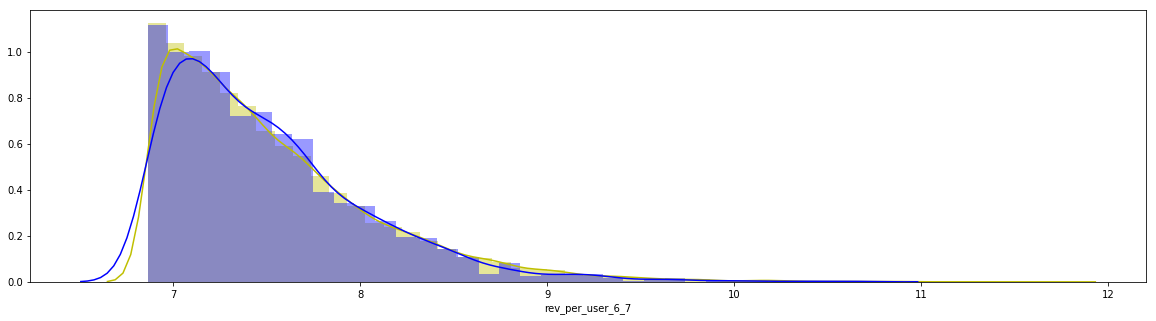

In [0]:
#revenue fr month 6 and 7, based on churn identity
target_0 = tele.loc[tele.churn == 0]
target_1 = tele.loc[tele.churn == 1]
plt.figure(figsize=(20,5))

sns.distplot(np.log(target_0['rev_per_user_6_7'])  , color="y")

sns.distplot(np.log(target_1['rev_per_user_6_7'])  , color="b")

#non churners generate greater revehue in the long run as compared to churnerns.

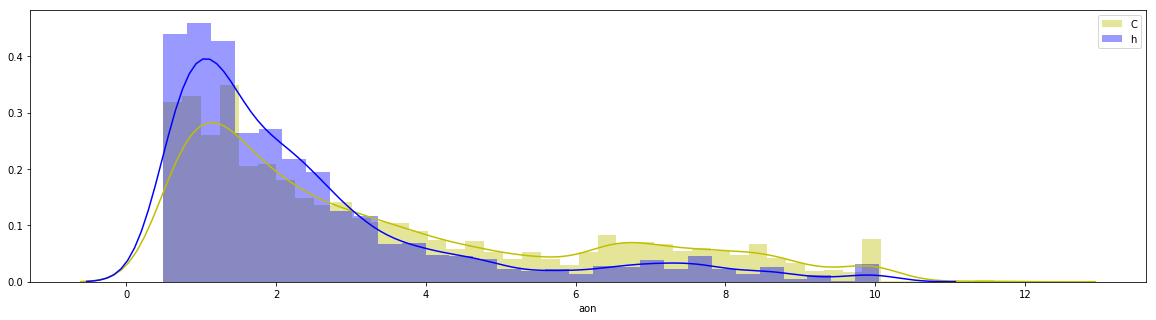

In [0]:
plt.figure(figsize=(20,5))

sns.distplot((target_0['aon'])  , color="y")
plt.legend('No churn')

sns.distplot((target_1['aon'])  , color="b")
plt.legend('Churned')

#age on network based on churn identity,none churners tend to stay for a longer perioed of time compared to churners
#users churn a lot during 1-5 year ranges

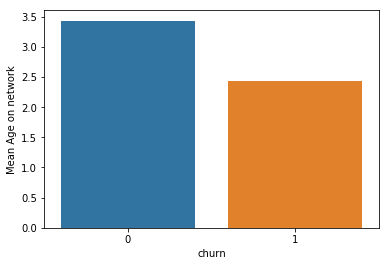

In [0]:
k  = pd.DataFrame(tele.groupby('churn')['aon'].mean())
k.columns = [ 'Mean Age on network']
sns.barplot(k.index , k[ 'Mean Age on network'] )

# mean age on network for non churners is greater.

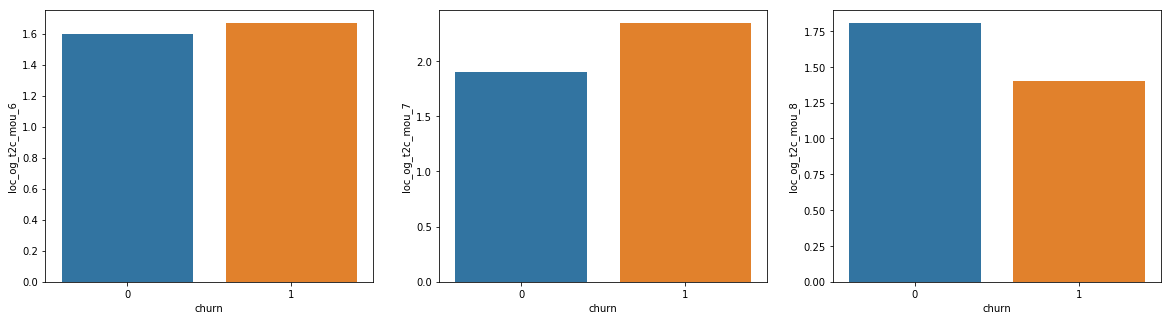

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(tele.groupby('churn')['loc_og_t2c_mou_6'].mean())
a.columns = [ 'loc_og_t2c_mou_6']
sns.barplot(a.index , a['loc_og_t2c_mou_6'] )
plt.subplot(1,3,2)
b  = pd.DataFrame(tele.groupby('churn')['loc_og_t2c_mou_7'].mean())
b.columns = [ 'loc_og_t2c_mou_7']
sns.barplot(b.index , b['loc_og_t2c_mou_7'] )

plt.subplot(1,3,3)
c  = pd.DataFrame(tele.groupby('churn')['loc_og_t2c_mou_8'].mean())
c.columns = [ 'loc_og_t2c_mou_8']
sns.barplot(c.index , c['loc_og_t2c_mou_8'] )
# Call to customer care too shoow a decreasing trend like other usage based KPI's

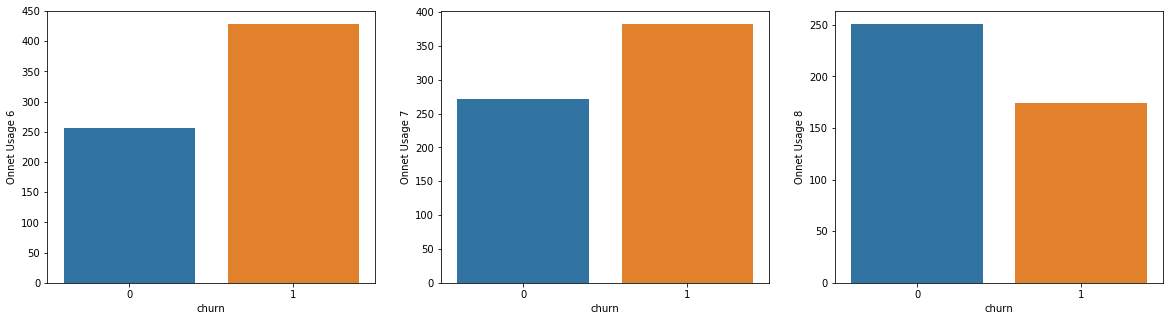

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(tele.groupby('churn')['onnet_mou_6'].mean())
a.columns = [ 'Onnet Usage 6']
sns.barplot(a.index , a['Onnet Usage 6'] )
plt.subplot(1,3,2)
b  = pd.DataFrame(tele.groupby('churn')['onnet_mou_7'].mean())
b.columns = [ 'Onnet Usage 7']
sns.barplot(b.index , b['Onnet Usage 7'] )

plt.subplot(1,3,3)
c  = pd.DataFrame(tele.groupby('churn')['onnet_mou_8'].mean())
c.columns = [ 'Onnet Usage 8']
sns.barplot(c.index , c['Onnet Usage 8'] )

# for non chruners the onnet usage is increasing continuously
#whereas for churners, the usage increases significantly, and then dcreases considerably f

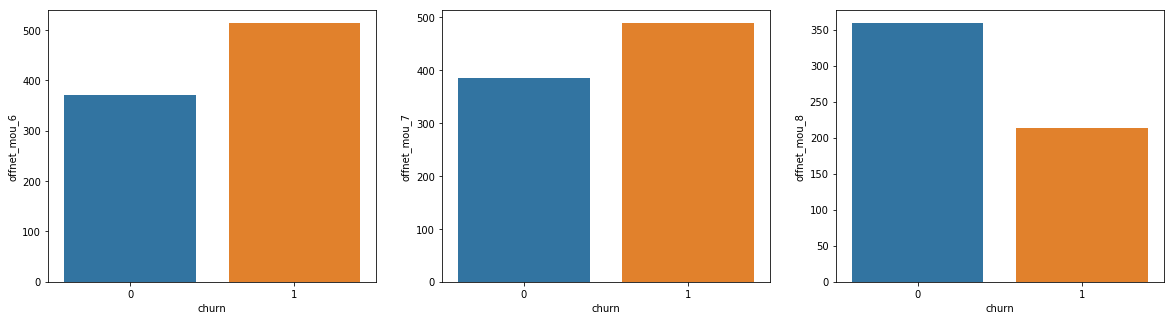

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
d = pd.DataFrame(tele.groupby('churn')['offnet_mou_6'].mean())
d.columns = [ 'offnet_mou_6']
sns.barplot(d.index , d['offnet_mou_6'] )
plt.subplot(1,3,2)
e  = pd.DataFrame(tele.groupby('churn')['offnet_mou_7'].mean())
e.columns = [ 'offnet_mou_7']
sns.barplot(e.index , e['offnet_mou_7'] )

plt.subplot(1,3,3)
f  = pd.DataFrame(tele.groupby('churn')['offnet_mou_8'].mean())
f.columns = [ 'offnet_mou_8']
sns.barplot(f.index , f['offnet_mou_8'] )

#same trend on offnet usage is visible as was in onnet usage

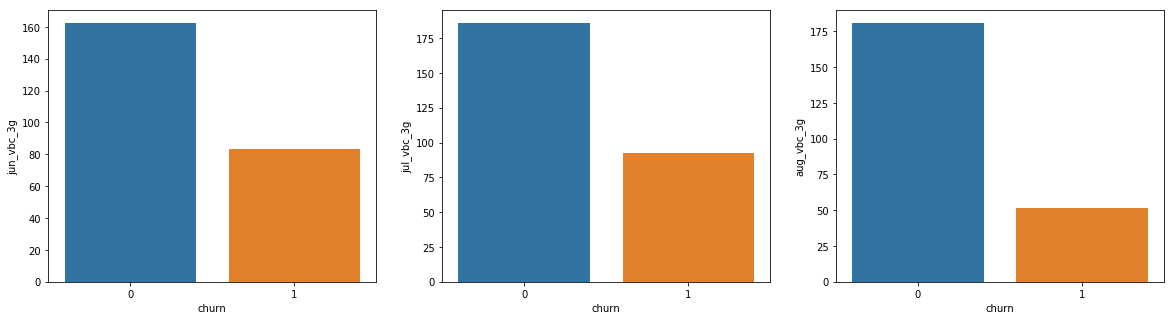

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(tele.groupby('churn')['jun_vbc_3g'].mean())
a.columns = [ 'jun_vbc_3g']
sns.barplot(a.index , a.jun_vbc_3g )
plt.subplot(1,3,2)
b  = pd.DataFrame(tele.groupby('churn')['jul_vbc_3g'].mean())
b.columns = [ 'jul_vbc_3g']
sns.barplot(b.index ,b.jul_vbc_3g )

plt.subplot(1,3,3)
c  = pd.DataFrame(tele.groupby('churn')['aug_vbc_3g'].mean())
c.columns = [ 'aug_vbc_3g']
sns.barplot(c.index , c.aug_vbc_3g )

#Volume baed charges is significanlty more for non churners as compared to charges for churner
# Volume bsed charges keeps on decreasing for chruners. Where for non chruners, the charger treand is decreasing

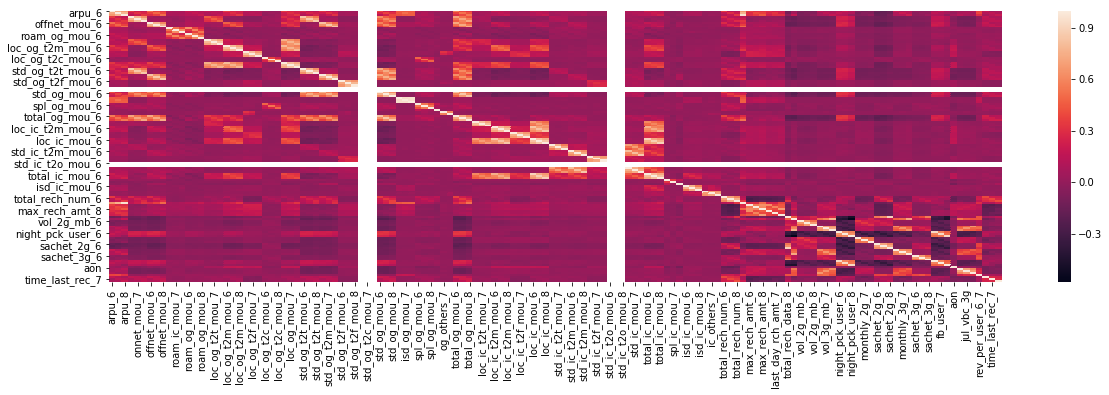

In [0]:
tele2 = tele.drop(columns = ['mobile_number','churn'], axis = 1)
plt.figure(figsize = (20,5))
sns.heatmap(tele2.corr())


# we see a lot of high correlated variable. We can delted them individually BUT we will use PCA while modelling that will take care of mulitcollinearity.

In [0]:
#Churn Rate
print('The Churn rate (in %) is' , round(sum(tele.churn)/ len(tele.index) * 100,2))
print('*'*60)
print('The total count is : \n',tele.churn.value_counts())

The Churn rate (in %) is 5.44
************************************************************
The total count is : 
 0    26589
1     1530
Name: churn, dtype: int64


In [0]:
tele.drop(columns = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], inplace = True)

In [0]:
tele.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rev_per_user_6_7,churn,time_last_rec_6,time_last_rec_7,time_last_rec_8
count,2.811900e+04,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,...,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000,28119.000000
mean,7.001213e+09,561.801404,573.218873,529.340820,265.794620,276.967186,246.532381,379.585296,390.417173,351.240056,...,1.394182,3.379056,173.875652,180.831971,158.163741,2317.278210,0.054412,-3.341513,-3.450301,-4.137203
std,6.874155e+05,449.338920,479.968974,500.713039,459.026965,483.249869,465.669094,477.365403,501.300846,482.739259,...,0.595729,2.637440,424.762719,447.291795,416.125282,2742.059601,0.226832,4.429199,4.245734,5.087591
min,7.000000e+09,-810.661000,-622.509000,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.490000,0.000000,0.000000,0.000000,957.000000,0.000000,-29.000000,-30.000000,-30.000000
25%,7.000622e+09,319.088500,325.271000,258.314000,20.280000,19.790000,15.380000,81.050000,81.160000,62.090000,...,1.000000,1.290000,0.000000,0.000000,0.000000,1212.000000,0.000000,-4.000000,-5.000000,-6.000000
50%,7.001216e+09,486.546000,490.930000,445.661000,90.490000,90.540000,75.190000,232.090000,232.810000,202.180000,...,1.000000,2.400000,0.000000,0.000000,0.000000,1610.000000,0.000000,-2.000000,-2.000000,-3.000000
75%,7.001805e+09,699.705000,706.350000,675.428500,300.060000,307.260000,260.500000,494.385000,507.800000,459.195000,...,2.000000,4.960000,143.010000,141.795000,98.460000,2428.000000,0.000000,0.000000,0.000000,-1.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,2.000000,11.840000,12916.220000,9165.600000,11166.210000,122472.000000,1.000000,0.000000,0.000000,0.000000


   **MODELLING**
        - Logisitic regression and its optimization
        - Decision tree and its optimization
        - Random forest and its optimization

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
# trying to handle class imbalance
b = tele
b.churn.value_counts()

0    26589
1     1530
Name: churn, dtype: int64

In [0]:

#creating a new db where class imbalance has been take care of

#upsampling the data

majority = b[b.churn == 0]
minority = b[b.churn == 1]

#upsample the minority class

from sklearn.utils import resample

df_upscaled = resample(minority, replace = True , n_samples = 26625, random_state = 123)
b_treated = pd.concat([majority,df_upscaled])
b_treated.churn.value_counts()

1    26625
0    26589
Name: churn, dtype: int64

In [0]:
b_treated.shape

(53214, 142)

In [0]:
#creating x y for test train split
from sklearn.model_selection import train_test_split

# Putting feature variable to X
x = b_treated.drop(['mobile_number','churn'],axis=1)
x = round(x / 100 , 2) # to make model simpler to understand

# Putting response variable to y
y = b_treated['churn']

x.head(5)

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rev_per_user_6_7,time_last_rec_6,time_last_rec_7,time_last_rec_8
8,3.79,4.92,1.37,4.14,3.51,0.35,0.95,0.81,1.36,0.0,...,0.01,0.01,0.01,0.21,9.11,1.22,13.92,-0.05,0.00,-0.01
21,5.14,5.98,6.38,1.02,1.32,0.85,7.58,8.97,9.83,0.0,...,0.02,0.02,0.02,0.00,0.00,0.00,12.80,0.00,0.00,0.00
23,0.74,1.94,3.67,0.49,0.51,0.34,0.85,0.89,2.06,0.0,...,0.01,0.01,0.02,0.40,0.52,0.00,11.66,-0.12,-0.24,-0.07
33,9.77,23.63,4.09,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.01,0.01,0.04,3.58,27.07,17.15,295.73,0.00,-0.01,-0.05
38,3.64,4.87,3.94,2.49,6.20,6.66,0.89,0.51,0.98,0.0,...,0.02,0.02,0.03,0.00,0.00,0.00,10.56,0.00,-0.03,-0.07


In [0]:
a =  b_treated.drop(['mobile_number','churn'],axis=1)

In [0]:
#Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x))
x.columns= a.columns
x.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rev_per_user_6_7,time_last_rec_6,time_last_rec_7,time_last_rec_8
count,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,...,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000,53214.000000
mean,0.049792,0.034291,0.023157,0.046276,0.039945,0.019708,0.053178,0.045216,0.020415,0.009634,...,0.731922,0.765503,0.245925,0.008994,0.015116,0.011006,0.010770,0.896099,0.880632,0.812604
std,0.016614,0.014952,0.014113,0.075068,0.067177,0.040902,0.069684,0.060810,0.031562,0.044882,...,0.292782,0.306780,0.202215,0.027935,0.043146,0.033845,0.021065,0.143491,0.146575,0.199113
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040397,0.026755,0.014311,0.003389,0.002819,0.000651,0.010404,0.008276,0.001856,0.000000,...,0.500000,0.500000,0.083333,0.000000,0.000000,0.000000,0.002082,0.862069,0.833333,0.766667
50%,0.046668,0.031759,0.020390,0.016402,0.013729,0.004743,0.030615,0.024723,0.009424,0.000000,...,1.000000,1.000000,0.166667,0.000000,0.000000,0.000000,0.005374,0.965517,0.933333,0.866667
75%,0.055147,0.038357,0.027738,0.056527,0.047806,0.019250,0.066970,0.057412,0.026344,0.000000,...,1.000000,1.000000,0.333333,0.000929,0.003818,0.001522,0.011719,1.000000,1.000000,0.933333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,test_size=0.3,random_state=100)

In [0]:
x_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rev_per_user_6_7,time_last_rec_6,time_last_rec_7,time_last_rec_8
16980,0.057704,0.045123,0.037475,0.072929,0.056999,0.033944,0.079168,0.084721,0.051403,0.000000,...,1.0,0.5,0.416667,0.066352,0.000000,0.000000,0.009596,1.000000,0.900000,0.866667
23930,0.050312,0.041097,0.032813,0.025620,0.038367,0.017948,0.020210,0.026275,0.015564,0.036357,...,0.5,0.5,0.583333,0.108935,0.118154,0.043077,0.009620,0.793103,0.700000,0.800000
277,0.039205,0.024407,0.014961,0.007862,0.009806,0.002325,0.006936,0.002690,0.001785,0.000000,...,0.5,0.5,0.666667,0.001007,0.004146,0.005732,0.000913,0.758621,0.833333,0.966667
37015,0.054446,0.027482,0.025170,0.137319,0.059819,0.033758,0.071992,0.024310,0.024202,0.000000,...,1.0,1.0,0.583333,0.000000,0.000000,0.000000,0.002082,0.931034,0.800000,0.866667
19891,0.052799,0.044200,0.033757,0.038091,0.065335,0.042965,0.066013,0.063722,0.027986,0.000000,...,0.5,0.5,0.333333,0.002478,0.000000,0.000000,0.009966,0.896552,0.900000,0.966667


In [0]:
y_train.value_counts()

0    18638
1    18611
Name: churn, dtype: int64

In [0]:
#running PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=50)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='randomized', tol=0.0, whiten=False)

In [0]:
columns = list(x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':columns})
pcs_df.head() , pcs_df.shape

(        PC1       PC2      Feature
 0 -0.003699  0.001945       arpu_6
 1 -0.002522  0.003021       arpu_7
 2 -0.000435  0.006675       arpu_8
 3 -0.022852  0.012142  onnet_mou_6
 4 -0.019105  0.015138  onnet_mou_7, (140, 3))

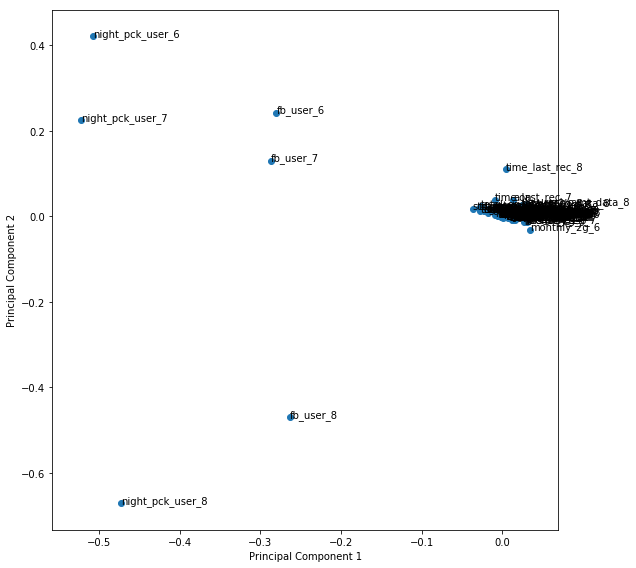

In [0]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

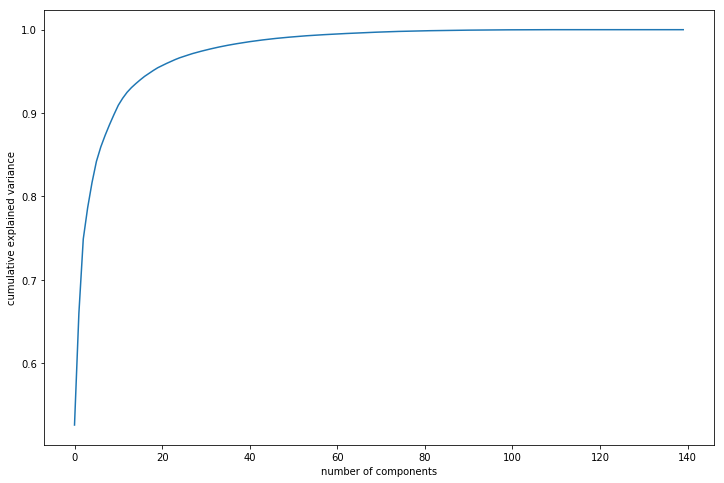

In [0]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [0]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20) #based on scree plot

In [0]:
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(37249, 20)

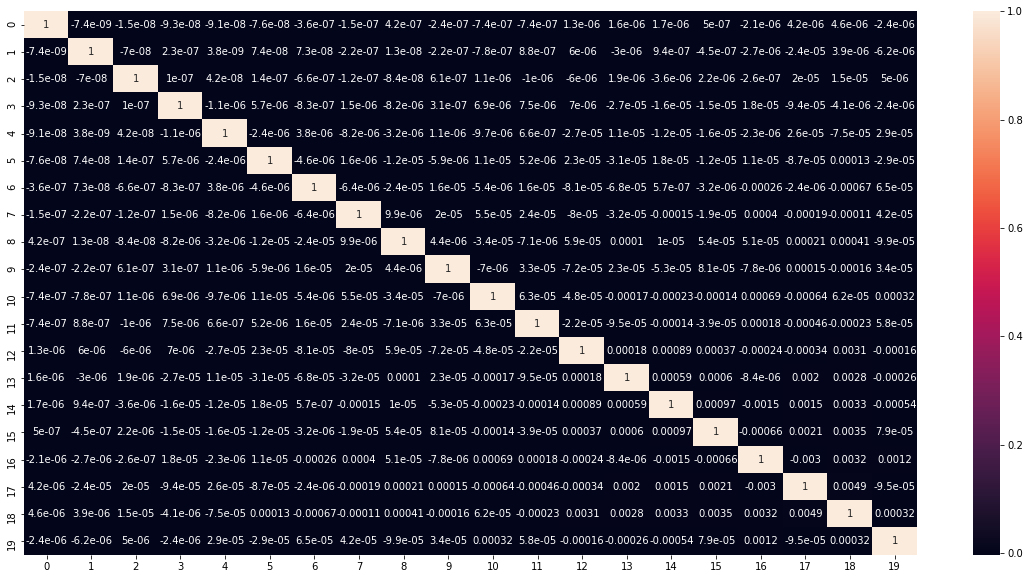

In [0]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True) # No correlation

In [0]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(x_test)
df_test_pca.shape

(15965, 20)

In [0]:
#Training the model on the train data - LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
#Making prediction on the test data
pred_test = model_pca.predict(df_test_pca)
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_test))

'0.76'

In [0]:
#Making probability predictions on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.84'

In [0]:
# Printing confusion matrix
print(confusion_matrix(y_test,pred_test))

[[5965 1986]
 [1867 6147]]


In [0]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,pred_test))

LogisticRegression accuracy with PCA:  0.7586595678045726


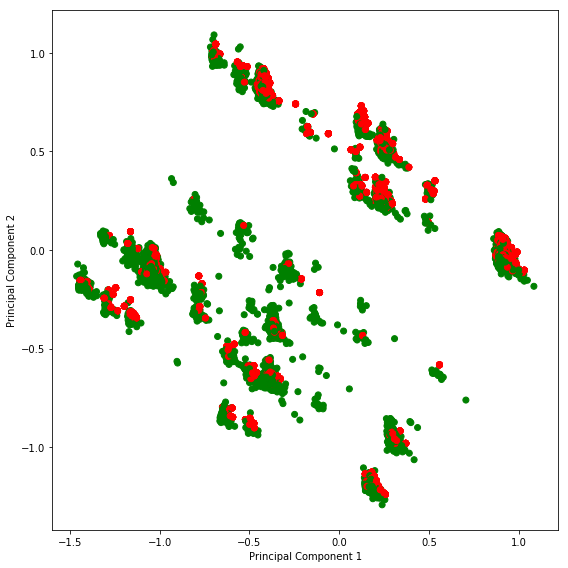

In [0]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [0]:
# logisitc regression using grid search CV

param = {'C': [ 1.0, 2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

logReg = LogisticRegression()

logReg_CV = GridSearchCV(logReg, param , cv=5)

logReg_CV.fit(df_train_pca,y_train)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
cv_results = pd.DataFrame(logReg_CV.cv_results_)
#cv_results = cv_results[cv_results[param_C']<=1000]
cv_results[cv_results.rank_test_score == 1]

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
9,0.385165,0.010318,0.002396,0.000486,10,{'C': 10.0},0.766474,0.770336,0.762013,0.757149,...,0.764906,0.004771,1,0.764749,0.767173,0.766301,0.767752,0.76406,0.766007,0.001404


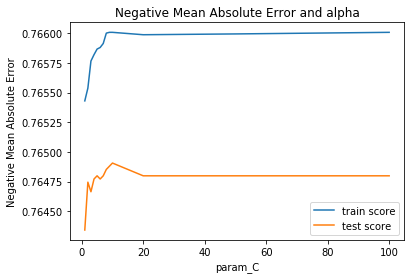

In [0]:
# plotting mean test and train scoes with alpha 

# but from cv_results data it is clear that alpha = 100 because its rank is 1
cv_results['param_C'] = cv_results['param_C'].astype('float32')

# plotting
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.xlabel('param_C')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [0]:
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(logReg_CV.best_params_))  
print("Best score is {}".format(logReg_CV.best_score_)) 

Tuned Logistic Regression Parameters: {'C': 10.0}
Best score is 0.7649064404413541


In [0]:
logReg_1 = LogisticRegression(C = 10)#based on above plot, the recommendation was 50. but if we look at the graph, there is not 
#much difference in 10 or 50. Therefore no use of assigning higher C values(penalty to model, i guss)
model =  logReg_CV.fit(df_train_pca,y_train)
pred = model.predict(df_test_pca)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

In [0]:

#Making probability predictions on the test data
pred_probs = model.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs)) , "{:2.5}".format(metrics.roc_auc_score(y_test, pred))

('0.84', '0.75982')

In [0]:
train_predict = model.predict_proba(df_train_pca)[:,1]
train_predict[:10]

array([0.02740735, 0.09925016, 0.11161875, 0.62504178, 0.03279298,
       0.8183985 , 0.42657149, 0.85574976, 0.35827184, 0.76361047])

In [0]:
y_train_predicted= pd.DataFrame({'churn':y_train.values, 'churn_prob': train_predict})
y_train_predicted.head()

,churn,churn_prob
0,0,0.027407
1,0,0.099250
2,0,0.111619
3,1,0.625042
4,0,0.032793


In [0]:
y_train_predicted['predicted'] = y_train_predicted.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_predicted.churn, y_train_predicted.predicted))

0.7658460629815566


In [0]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_predicted.churn, y_train_predicted.churn_prob, drop_intermediate = False )

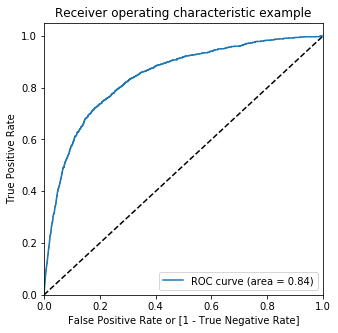

In [0]:
draw_roc( y_train_predicted.churn, y_train_predicted.churn_prob)

In [0]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predicted[i]= y_train_predicted.churn_prob.map(lambda x: 1 if x > i else 0)
y_train_predicted.head()

,churn,churn_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.027407,0,1,0,0,0,0,0,0,0,0,0
1,0,0.099250,0,1,0,0,0,0,0,0,0,0,0
2,0,0.111619,0,1,1,0,0,0,0,0,0,0,0
3,1,0.625042,1,1,1,1,1,1,1,1,0,0,0
4,0,0.032793,0,1,0,0,0,0,0,0,0,0,0


In [0]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(  y_train_predicted.churn,   y_train_predicted[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.499638  1.000000  0.000000
0.1   0.1  0.580902  0.984740  0.177648
0.2   0.2  0.662031  0.949868  0.374611
0.3   0.3  0.722301  0.906829  0.538041
0.4   0.4  0.757121  0.848853  0.665522
0.5   0.5  0.765846  0.765945  0.765747
0.6   0.6  0.766007  0.679867  0.852023
0.7   0.7  0.727322  0.541615  0.912759
0.8   0.8  0.661521  0.366289  0.956326
0.9   0.9  0.580311  0.176132  0.983904


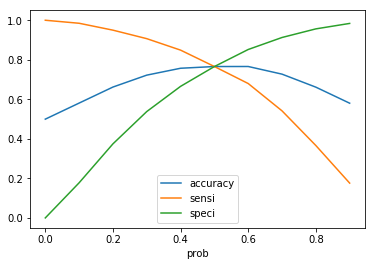

In [0]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [0]:
y_train_predicted['predicted'] = y_train_predicted.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_predicted.churn, y_train_predicted.predicted))

0.7658460629815566


In [0]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_predicted.churn, y_train_predicted.predicted)

0.7655335374040062

In [0]:
recall_score(y_train_predicted.churn, y_train_predicted.predicted)

0.7659448713126645

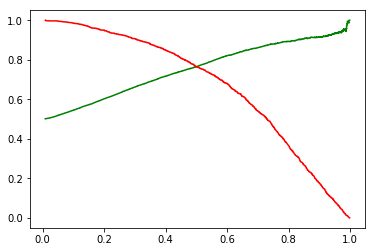

In [0]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_predicted.churn, y_train_predicted.churn_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [0]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(pred_probs)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})


y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.48 else 0)
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.7612903225806451

#### After model optimization we got 76% accuracy

# Decision Tree

In [0]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
# Making predictions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred_default = dt_default.predict(df_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))


              precision    recall  f1-score   support

           0       0.79      0.73      0.76      7951
           1       0.75      0.81      0.78      8014

   micro avg       0.77      0.77      0.77     15965
   macro avg       0.77      0.77      0.77     15965
weighted avg       0.77      0.77      0.77     15965



In [0]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[5832 2119]
 [1549 6465]]
0.7702474162229878


***Decision Tree Hyper Parameter Tuning***

In [0]:
n_folds = 3 

parameters = {'max_depth': range(1,40 , 5)}

tree = DecisionTreeClassifier(criterion = 'gini', random_state = 100)

#fit on data

tree_model = GridSearchCV(tree , parameters, cv = n_folds, scoring = 'accuracy')
tree_model.fit(df_train_pca,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 40, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [0]:
score = tree_model.cv_results_
pd.DataFrame(score).head()

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.149046,0.029849,0.004998,0.001632,1,{'max_depth': 1},0.690827,0.683015,0.692147,0.688663,0.004030,8,0.688225,0.692252,0.687646,0.689374,0.002049
1,0.430021,0.013048,0.004331,0.001246,6,{'max_depth': 6},0.782798,0.780301,0.788079,0.783726,0.003242,7,0.800056,0.788418,0.793751,0.794075,0.004757
2,0.682547,0.021954,0.005666,0.001698,11,{'max_depth': 11},0.878312,0.877829,0.888925,0.881688,0.005120,6,0.910277,0.903471,0.915801,0.909850,0.005043
3,0.792858,0.045952,0.004663,0.000470,16,{'max_depth': 16},0.923492,0.936861,0.937495,0.932616,0.006457,5,0.961260,0.973824,0.969880,0.968321,0.005246
4,0.796509,0.011770,0.005330,0.000469,21,{'max_depth': 21},0.941532,0.948619,0.952718,0.947623,0.004621,4,0.985060,0.988241,0.986752,0.986684,0.001300


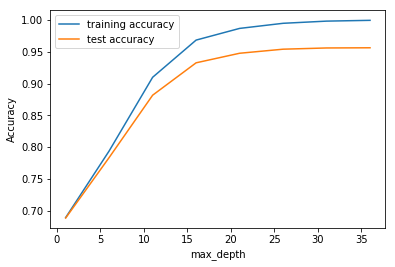

In [0]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
          score["mean_train_score"], 
          label="training accuracy")
plt.plot(score["param_max_depth"], 
          score["mean_test_score"], 
          label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# max_depth = 25

In [0]:
# specify number of folds for k-fold CV
n_folds = 5

# # parameters to build the model on
parameters = {'min_samples_leaf': range(5, 40, 5)}

# # instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                                random_state = 100)

# # fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(5, 40, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
score = tree.cv_results_
pd.DataFrame(score).head()


C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.765100,0.059715,0.002421,0.002349,5,{'min_samples_leaf': 5},0.943632,0.941208,0.946309,0.945899,...,0.943864,0.001988,1,0.977347,0.979395,0.979295,0.979295,0.978926,0.978852,0.000769
1,0.722439,0.038562,0.002012,0.003113,10,{'min_samples_leaf': 10},0.910750,0.909933,0.914228,0.908041,...,0.910843,0.002016,2,0.946909,0.947918,0.945904,0.947248,0.948691,0.947334,0.000940
2,0.705075,0.033001,0.003126,0.006251,15,{'min_samples_leaf': 15},0.889813,0.887517,0.892215,0.885085,...,0.889500,0.002907,3,0.923888,0.923387,0.921675,0.923490,0.921745,0.922837,0.000935
3,0.761496,0.041054,0.001400,0.001200,20,{'min_samples_leaf': 20},0.882700,0.874631,0.875570,0.871929,...,0.876426,0.003586,4,0.910732,0.907614,0.909997,0.912450,0.904430,0.909045,0.002782
4,0.833518,0.107196,0.003198,0.002038,25,{'min_samples_leaf': 25},0.878271,0.864161,0.867517,0.864546,...,0.868641,0.005116,5,0.900832,0.896708,0.896540,0.898725,0.897953,0.898152,0.001564


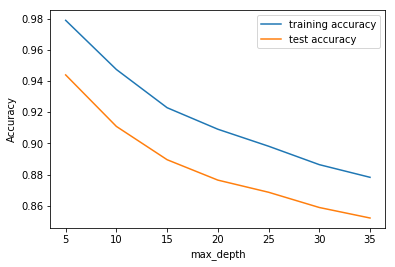

In [0]:
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
          score["mean_train_score"], 
          label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
          score["mean_test_score"], 
          label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#param_min_samples_leaf = 10

In [0]:
# # specify number of folds for k-fold CV
n_folds = 5

# # parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# # instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                                random_state = 100)

# # fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                     cv=n_folds, 
                    scoring="accuracy")
tree.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


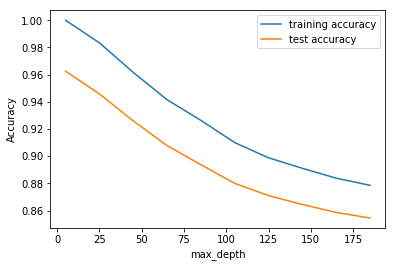

In [0]:
score = tree.cv_results_
plt.figure()
plt.plot(score["param_min_samples_split"], 
          score["mean_train_score"], 
          label="training accuracy")
plt.plot(score["param_min_samples_split"], 
          score["mean_test_score"], 
          label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# param_min_samples_split = 25 becasue at lesser min sample per split, the model might overfit

In [0]:
# # Create the parameter grid 
param_grid = {
     'max_depth': range(5, 30, 5),
     'min_samples_leaf': range(1, 100, 10),
     'min_samples_split': range(25, 100, 25),
     'criterion': ["entropy", "gini"]
}

n_folds = 3

# # Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                           cv = n_folds, verbose = 1)

# # Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed: 11.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 30, 5), 'min_samples_leaf': range(1, 100, 10), 'min_samples_split': range(25, 100, 25), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [0]:
# # cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.778520,0.016960,0.003999,8.163404e-04,entropy,5,1,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750262,0.764355,0.766170,0.760262,0.007110,271,0.766551,0.764256,0.767698,0.766168,0.001431
1,0.852808,0.002357,0.004331,4.729438e-04,entropy,5,1,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750262,0.764355,0.765928,0.760181,0.007044,275,0.766551,0.764256,0.767456,0.766088,0.001347
2,1.360571,0.080561,0.005997,1.413325e-03,entropy,5,1,75,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750262,0.764355,0.765928,0.760181,0.007044,275,0.766551,0.764256,0.767456,0.766088,0.001347
3,0.974584,0.210631,0.003998,8.162428e-04,entropy,5,11,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750262,0.764355,0.765928,0.760181,0.007044,275,0.766551,0.764256,0.767456,0.766088,0.001347
4,0.788556,0.119962,0.003997,8.157561e-04,entropy,5,11,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750262,0.764355,0.765928,0.760181,0.007044,275,0.766551,0.764256,0.767456,0.766088,0.001347
5,0.796208,0.173798,0.003998,8.152695e-04,entropy,5,11,75,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750262,0.764355,0.765928,0.760181,0.007044,275,0.766551,0.764256,0.767456,0.766088,0.001347
6,0.794522,0.226585,0.006996,4.963395e-03,entropy,5,21,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750262,0.764597,0.765767,0.760208,0.007050,272,0.766551,0.764175,0.767335,0.766021,0.001343
7,0.913647,0.143293,0.005661,9.444896e-04,entropy,5,21,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750262,0.764597,0.765767,0.760208,0.007050,272,0.766551,0.764175,0.767335,0.766021,0.001343
8,0.696322,0.042586,0.004671,4.682920e-04,entropy,5,21,75,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750262,0.764597,0.765767,0.760208,0.007050,272,0.766551,0.764175,0.767335,0.766021,0.001343
9,0.729575,0.078692,0.003664,4.695164e-04,entropy,5,31,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.750262,0.764275,0.765526,0.760020,0.006920,280,0.766551,0.764095,0.767214,0.765953,0.001342


In [0]:
# # printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9355687401004054
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [0]:

# # model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                   random_state = 100,
                                   max_depth=25, 
                                   min_samples_leaf=1,
                                   min_samples_split=25)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [0]:
clf_gini.predict(df_test_pca)
pred_probs = clf_gini.predict_proba(df_test_pca)[:,1]

In [0]:
train_predict = clf_gini.predict_proba(df_train_pca)[:,1]
y_train_predicted= pd.DataFrame({'churn':y_train.values, 'churn_prob': train_predict})
y_train_predicted['predicted'] = y_train_predicted.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_predicted.churn, y_train_predicted.predicted))

0.9816370909286155


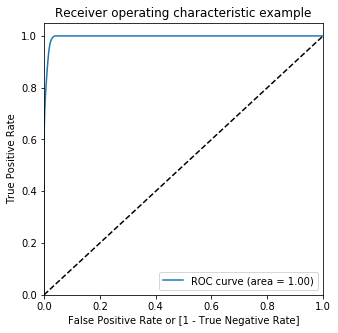

In [0]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_predicted.churn, y_train_predicted.churn_prob, drop_intermediate = False )
draw_roc( y_train_predicted.churn, y_train_predicted.churn_prob)

In [0]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predicted[i]= y_train_predicted.churn_prob.map(lambda x: 1 if x > i else 0)

    
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(  y_train_predicted.churn,   y_train_predicted[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.980402  1.000000  0.960833
0.1   0.1  0.980402  1.000000  0.960833
0.2   0.2  0.980402  1.000000  0.960833
0.3   0.3  0.981261  0.999248  0.963301
0.4   0.4  0.981557  0.998334  0.964803
0.5   0.5  0.981637  0.996239  0.967057
0.6   0.6  0.981127  0.991081  0.971188
0.7   0.7  0.979865  0.985976  0.973763
0.8   0.8  0.976214  0.974800  0.977626
0.9   0.9  0.961583  0.940035  0.983099


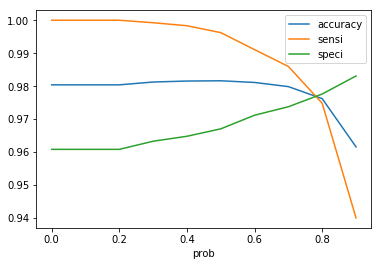

In [0]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# The cutoff take is 0.8

In [0]:
y_train_predicted['predicted'] = y_train_predicted.churn_prob.map(lambda x: 1 if x > 0.8 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_predicted.churn, y_train_predicted.predicted))

0.976214126553733


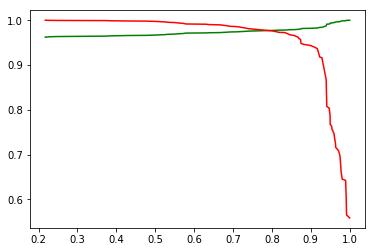

In [0]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_predicted.churn, y_train_predicted.predicted)

recall_score(y_train_predicted.churn, y_train_predicted.predicted)
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_predicted.churn, y_train_predicted.churn_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# The cutoff taken is 0.81

In [0]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(pred_probs)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.81 else 0)
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.9449420607579079

In [0]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test, y_pred_final.final_predicted))

[[7347  604]
 [ 275 7739]]


#### After model optimization we got 95% accuracy

# RANDOM FOREST

In [0]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(df_train_pca , y_train)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
# Making predictions
predictions = rfc.predict(df_test_pca)
predictions_train = rfc.predict(df_train_pca)

In [0]:
print(accuracy_score(y_train,predictions_train)) , print(accuracy_score(y_test,predictions))

0.9999194609251255
0.9910429063576573


(None, None)

In [0]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7951
           1       0.98      1.00      0.99      8014

   micro avg       0.99      0.99      0.99     15965
   macro avg       0.99      0.99      0.99     15965
weighted avg       0.99      0.99      0.99     15965



In [0]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[7808  143]
 [   0 8014]]


In [0]:
print(accuracy_score(y_test,predictions))

0.9910429063576573


**Got 99% accuracy, need to check further if any class imbalance did affect the model or not**
**forward to hyperparameter optimization**

In [0]:
# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'max_depth': range(20, 30, 3)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\si

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(20, 30, 3)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.926123,0.005792,0.028986,0.000005,20,{'max_depth': 20},0.979866,0.979625,0.979621,0.979704,0.000115,4,0.996617,0.996416,0.996698,0.996577,0.000119
1,0.938756,0.012804,0.029315,0.001247,23,{'max_depth': 23},0.983088,0.981799,0.984454,0.983114,0.001084,3,0.999476,0.998993,0.998832,0.999101,0.000274
2,0.922766,0.037944,0.033312,0.002866,26,{'max_depth': 26},0.983249,0.983007,0.984535,0.983597,0.000670,2,0.999718,0.999315,0.999477,0.999503,0.000165
3,0.944083,0.015996,0.032648,0.002622,29,{'max_depth': 29},0.982766,0.983007,0.986146,0.983973,0.001540,1,0.999557,0.999517,0.999638,0.999570,0.000050


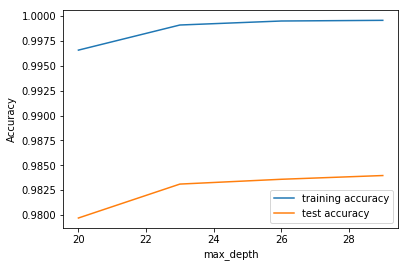

In [0]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters =  {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=20)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, n_jobs = -1,
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Dell\Anaconda2\envs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,21.359020,0.323629,0.496054,0.257245,100,{'n_estimators': 100},0.983358,0.982685,0.983624,0.983890,...,0.983275,0.000462,4,0.997617,0.997617,0.997080,0.997114,0.997483,0.997382,0.000238
1,113.944672,5.971851,3.888665,1.198328,500,{'n_estimators': 500},0.984029,0.983490,0.983356,0.984964,...,0.983892,0.000582,3,0.997584,0.997718,0.997584,0.997047,0.998020,0.997591,0.000315
2,207.323150,14.959033,8.216242,1.471338,900,{'n_estimators': 900},0.984163,0.984027,0.983758,0.985099,...,0.984161,0.000495,2,0.997617,0.997684,0.997080,0.997114,0.997819,0.997463,0.000306
3,233.990765,46.076760,9.074112,3.671203,1300,{'n_estimators': 1300},0.985237,0.984161,0.983356,0.984427,...,0.984295,0.000601,1,0.997752,0.997785,0.997349,0.997047,0.997886,0.997564,0.000317


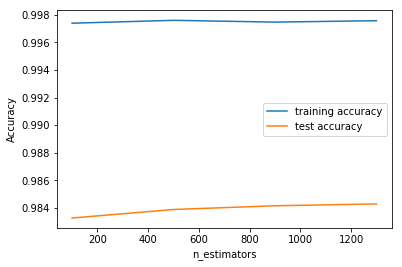

In [0]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features':[1, 4, 8, 14, 20 ]}

# instantiate the model
rf = RandomForestClassifier(max_depth=20)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\si

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [1, 4, 8, 14, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


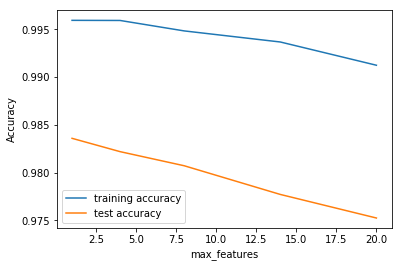

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 3

# parameters to build the model on
parameters = {'min_samples_leaf': range(10,600,100)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\si

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(10, 600, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


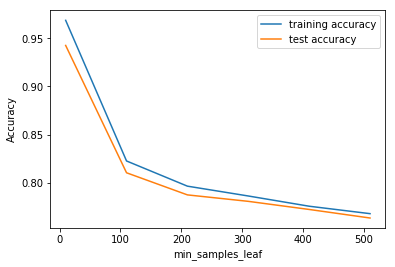

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_

plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(2, 50, 4)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(df_train_pca, y_train)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\si

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(2, 50, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


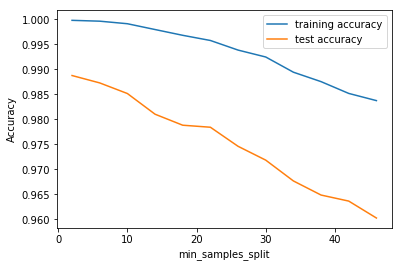

In [0]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [0]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [15,20],
    'min_samples_leaf': range(2,10,3),
    'min_samples_split': range(30,40,5),
    'n_estimators': [200,600, 200], 
    'max_features': [4, 8, 14 ]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1,verbose = 1)

In [0]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 72.5min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 84.1min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [15, 20], 'min_samples_leaf': range(2, 10, 3), 'min_samples_split': range(30, 40, 5), 'n_estimators': [200, 600, 200], 'max_features': [4, 8, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [0]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9493946146205268 using {'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 2, 'min_samples_split': 30, 'n_estimators': 600}


In [0]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=2, 
                             min_samples_split=30,
                             max_features=8,
                             n_estimators=100)

In [0]:
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=30,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
predictions = rfc.predict(df_test_pca)
pred_probs = rfc.predict_proba(df_test_pca)[:,1]

In [0]:
train_predict = rfc.predict_proba(df_train_pca)[:,1]
y_train_predicted= pd.DataFrame({'churn':y_train.values, 'churn_prob': train_predict})
y_train_predicted['predicted'] = y_train_predicted.churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_predicted.churn, y_train_predicted.predicted))

0.9913554726301377


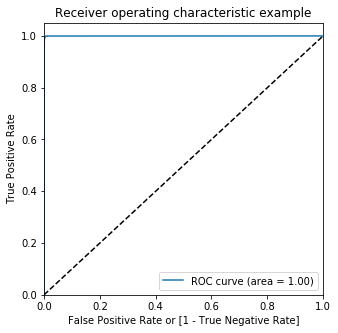

In [0]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

fpr, tpr, thresholds = metrics.roc_curve( y_train_predicted.churn, y_train_predicted.churn_prob, drop_intermediate = False )
draw_roc( y_train_predicted.churn, y_train_predicted.churn_prob)

In [0]:
y_train_predicted.head()

,churn,churn_prob,predicted
0,0,0.002507,0
1,0,0.006341,0
2,0,0.028826,0
3,1,0.944862,1
4,0,0.001972,0


In [0]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predicted[i]= y_train_predicted.churn_prob.map(lambda x: 1 if x > i else 0)


# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(  y_train_predicted.churn,   y_train_predicted[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.504926  1.000000  0.010570
0.1   0.1  0.847405  1.000000  0.695032
0.2   0.2  0.936508  1.000000  0.873109
0.3   0.3  0.968321  1.000000  0.936688
0.4   0.4  0.983597  0.999678  0.967539
0.5   0.5  0.991355  0.999678  0.983045
0.6   0.6  0.996080  0.999140  0.993025
0.7   0.7  0.994684  0.991027  0.998337
0.8   0.8  0.970791  0.941809  0.999732
0.9   0.9  0.872211  0.744237  1.000000


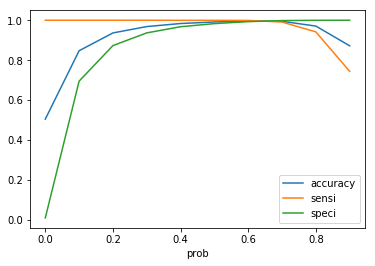

In [0]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [0]:
y_train_predicted['predicted'] = y_train_predicted.churn_prob.map(lambda x: 1 if x > 0.6 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_predicted.churn, y_train_predicted.predicted))

0.9960804316894414


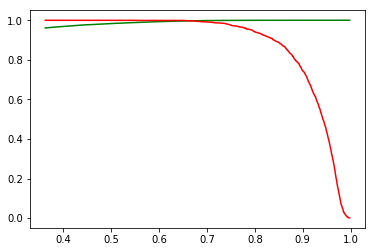

In [0]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_predicted.churn, y_train_predicted.predicted)

recall_score(y_train_predicted.churn, y_train_predicted.predicted)
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_predicted.churn, y_train_predicted.churn_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [0]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(pred_probs)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.7 else 0)
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.9836517381772628

In [0]:
print(confusion_matrix(y_test,y_pred_final['final_predicted']))

[[7830  121]
 [ 140 7874]]


#### After model optimization we got 98% accuracy

**FINAL VERDICT on models**


***We are getting the followng from above models after hyperparameter optimization and model evaluation***

    - Logistic : 76 % Accuracy
    - Decison Tee : 95 % Accuracy
    - Random Forest : 98% Accuracy


- **We can choose random forest model, provided computational power is not an issue**

### ***To get the significant variables***

In [0]:
#Lasso With Logistic Regression

x_lasso = b_treated.drop(columns = ['mobile_number','churn'], axis = 1)
y_lasso = b_treated['churn']

y_lasso.value_counts() 

1    26625
0    26589
Name: churn, dtype: int64

In [0]:
b = pd.DataFrame(x_lasso).columns
b

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'rev_per_user_6_7', 'time_last_rec_6', 'time_last_rec_7',
       'time_last_rec_8'],
      dtype='object', length=140)

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = preprocessing.StandardScaler()
x_lasso = scaler.fit_transform(x_lasso)

#spliting the dataset

x_tr, x_tes, y_tr, y_tes = train_test_split(x_lasso, y_lasso, test_size=0.3, train_size=0.7, random_state=1)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
x_tr = pd.DataFrame(x_tr)
y_tr = pd.DataFrame(y_tr)
x_tr.shape , y_tr.shape

((37249, 140), (37249, 1))

In [0]:
x_tr.columns = b 
x_tr.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,rev_per_user_6_7,time_last_rec_6,time_last_rec_7,time_last_rec_8
0,-0.788938,-0.598394,-0.536166,-0.616464,-0.594630,-0.481856,-0.763130,-0.743586,-0.569917,-0.214662,...,-0.792140,-0.865461,-0.394964,-0.321976,-0.350344,-0.325201,4.740553,0.724096,0.359553,0.606340
1,-0.548732,-0.136018,0.358345,-0.527963,-0.551821,-0.431927,-0.655475,-0.482155,-0.346296,-0.214662,...,-0.792140,-0.865461,-0.956787,3.849429,0.608026,0.663183,0.156398,-2.399994,0.586970,-0.063304
2,-0.092507,-0.339244,-0.918498,0.281475,-0.278748,-0.480128,0.664643,0.298718,-0.646825,-0.214662,...,0.915632,0.764388,-0.469323,-0.321976,-0.350344,-0.325201,-0.442894,0.724096,-0.550115,0.104107
3,-0.686705,-0.463249,-0.322205,-0.388828,-0.476423,-0.404597,-0.072446,-0.226797,-0.317523,-0.214662,...,-0.792140,0.764388,1.071557,-0.321976,-0.350344,-0.325201,-0.496026,0.243467,-1.004949,0.271518
4,-0.385680,-0.449377,-0.666598,0.726146,0.612551,-0.156518,-0.341419,-0.407730,-0.598690,-0.194538,...,0.915632,0.764388,-0.279295,-0.321976,-0.350344,-0.325201,-0.467116,0.243467,0.586970,0.104107


In [0]:
import statsmodels.api as sm
x_tr.index = range(len(x_tr.index))
y_tr.index = range(len(y_tr.index))
x_tr_sm = sm.add_constant((x_tr))
logm1 = sm.GLM((y_tr),(x_tr_sm), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37249
Model:                            GLM   Df Residuals:                    37115
Model Family:                Binomial   Df Model:                          133
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15472.
Date:                Mon, 13 May 2019   Deviance:                       30945.
Time:                        05:36:45   Pearson chi2:                 8.46e+04
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0455      0.016     -2.833      0.005      -0.077      -0.014
arpu_6                 0.0246      0.042      0.581      0.561      -0.058       0.108
arpu_7                -0.0570      0.057     -1.001      0.317      -0.169       0.055
arpu_8                 0.5506      0.078      7.016      0.000       0.397       0.704
onnet_mou_6           -4.9675      1.622     -3.063      0.002      -8.146      -1.789
onnet_mou_7           -0.1125      1.234     -0.091      0.927      -2.531       2.306
onnet_mou_8            2.2346      1.161      1.924      0.054      -0.042       4.511
offnet_mou_6          -4.9053      1.690     -2.903      0.004      -8.217      -1.594
offnet_mou_7          -0.3926      1.275     -0.308      0.758      -2.893       2.107
offnet_mou_8           1.3676      1.141      1.199      0.231      -0.869       3.604
roam_ic_mou_6          0.0500      0.031      1.592      0.111      -0.012       0.111
roam_ic_mou_7          0.0912      0.040      2.263      0.024       0.012       0.170
roam_ic_mou_8          0.0278      0.027      1.019      0.308      -0.026       0.081
roam_og_mou_6          1.5747      0.517      3.046      0.002       0.561       2.588
roam_og_mou_7          0.3362      0.346      0.972      0.331      -0.342       1.014
roam_og_mou_8         -0.5749      0.445     -1.293      0.196      -1.446       0.297
loc_og_t2t_mou_6    1373.8115    558.644      2.459      0.014     278.889    2468.734
loc_og_t2t_mou_7   -1097.3635    553.361     -1.983      0.047   -2181.932     -12.795
loc_og_t2t_mou_8    3440.5797    497.642      6.914      0.000    2465.219    4415.941
loc_og_t2m_mou_6    1451.2570    590.236      2.459      0.014     294.416    2608.098
loc_og_t2m_mou_7   -1183.1941    596.590     -1.983      0.047   -2352.490     -13.899
loc_og_t2m_mou_8    3788.2980    547.842      6.915      0.000    2714.547    4862.049
loc_og_t2f_mou_6     219.6788     89.235      2.462      0.014      44.781     394.577
loc_og_t2f_mou_7    -150.6981     75.714     -1.990      0.047    -299.095      -2.301
loc_og_t2f_mou_8     298.5821     43.164      6.917      0.000     213.982     383.183
loc_og_t2c_mou_6      -0.0729      0.020     -3.633      0.000      -0.112      -0.034
loc_og_t2c_mou_7       0.0381      0.026      1.489      0.136      -0.012       0.088
loc_og_t2c_mou_8       0.1334      0.023      5.749      0.000       0.088       0.179
loc_og_mou_6       -4823.2142   1127.119     -4.279      0.000   -7032.327   -2614.101
loc_og_mou_7       -3142.1632   1165.004     -2.697      0.007   -5425.528    -858.798
loc_og_mou_8       -2186.4489   1099.092     -1.989      0.047   -4340.630     -32.268
std_og_t2t_mou_6    1066.4271   1653.057      0.645      0.519   -2173.505    4306.360
std_og_t2t_mou_7   -7284.9472   1672.692     -4.355      0.000   -1.06e+04   -4006.531
std_og_t2t_mou_8    3932.6924 

In [0]:
x_tr = x_tr.drop('arpu_6',1)

In [0]:
x_tr.index = range(len(x_tr.index))
y_tr.index = range(len(y_tr.index))
x_tr_sm = sm.add_constant((x_tr))
logm2 = sm.GLM((y_tr),(x_tr_sm), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37249
Model:                            GLM   Df Residuals:                    37116
Model Family:                Binomial   Df Model:                          132
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15473.
Date:                Mon, 13 May 2019   Deviance:                       30945.
Time:                        05:41:59   Pearson chi2:                 8.42e+04
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0455      0.016     -2.839      0.005      -0.077      -0.014
arpu_7                -0.0462      0.054     -0.859      0.390      -0.152       0.059
arpu_8                 0.5602      0.077      7.315      0.000       0.410       0.710
onnet_mou_6           -5.0779      1.610     -3.154      0.002      -8.234      -1.922
onnet_mou_7           -0.0567      1.232     -0.046      0.963      -2.471       2.358
onnet_mou_8            2.2501      1.161      1.939      0.053      -0.025       4.525
offnet_mou_6          -5.0193      1.677     -2.992      0.003      -8.307      -1.732
offnet_mou_7          -0.3423      1.274     -0.269      0.788      -2.840       2.155
offnet_mou_8           1.3872      1.140      1.217      0.224      -0.847       3.622
roam_ic_mou_6          0.0498      0.031      1.587      0.113      -0.012       0.111
roam_ic_mou_7          0.0918      0.040      2.282      0.022       0.013       0.171
roam_ic_mou_8          0.0279      0.027      1.022      0.307      -0.026       0.081
roam_og_mou_6          1.6169      0.512      3.160      0.002       0.614       2.620
roam_og_mou_7          0.3189      0.345      0.924      0.355      -0.357       0.995
roam_og_mou_8         -0.5836      0.444     -1.314      0.189      -1.454       0.287
loc_og_t2t_mou_6    1353.3324    557.242      2.429      0.015     261.158    2445.507
loc_og_t2t_mou_7   -1093.9525    553.129     -1.978      0.048   -2178.066      -9.840
loc_og_t2t_mou_8    3438.0237    497.424      6.912      0.000    2463.091    4412.957
loc_og_t2m_mou_6    1429.6214    588.755      2.428      0.015     275.683    2583.559
loc_og_t2m_mou_7   -1179.5144    596.340     -1.978      0.048   -2348.319     -10.710
loc_og_t2m_mou_8    3785.4831    547.602      6.913      0.000    2712.203    4858.763
loc_og_t2f_mou_6     216.4093     89.012      2.431      0.015      41.950     390.869
loc_og_t2f_mou_7    -150.2317     75.682     -1.985      0.047    -298.566      -1.897
loc_og_t2f_mou_8     298.3597     43.145      6.915      0.000     213.796     382.923
loc_og_t2c_mou_6      -0.0730      0.020     -3.638      0.000      -0.112      -0.034
loc_og_t2c_mou_7       0.0380      0.026      1.485      0.137      -0.012       0.088
loc_og_t2c_mou_8       0.1333      0.023      5.750      0.000       0.088       0.179
loc_og_mou_6       -4812.1304   1126.453     -4.272      0.000   -7019.938   -2604.323
loc_og_mou_7       -3136.2446   1164.482     -2.693      0.007   -5418.587    -853.902
loc_og_mou_8       -2188.7886   1098.629     -1.992      0.046   -4342.061     -35.516
std_og_t2t_mou_6    1060.9997   1652.407      0.642      0.521   -2177.658    4299.657
std_og_t2t_mou_7   -7285.5383   1672.136     -4.357      0.000   -1.06e+04   -4008.212
std_og_t2t_mou_8    3937.7900   1359.379      2.897      0.004    1273.457    6602.123
std_og_t2m_mou_6    1097.4679 

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(x_tr, y_tr)

C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dell\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\logistic

In [0]:
col = x_tr.columns[rfe.support_]
x_tr.columns[~rfe.support_]
x_tr_sm = sm.add_constant(x_tr[col])
logm2 = sm.GLM(np.array(y_tr),np.array(x_tr_sm), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37249
Model:                            GLM   Df Residuals:                    37233
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17295.
Date:                Mon, 13 May 2019   Deviance:                       34590.
Time:                        05:48:50   Pearson chi2:                 9.27e+04
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0831      0.015     -5.600      0.000      -0.112      -0.054
x1             1.4282      0.081     17.731      0.000       1.270       1.586
x2             0.4615      0.026     17.959      0.000       0.411       0.512
x3            -0.7382      0.044    -16.675      0.000      -0.825      -0.651
x4             0.3498      0.044      7.921      0.000       0.263       0.436
x5            -0.3724      0.046     -8.013      0.000      -0.463      -0.281
x6             1.4334      0.083     17.236      0.000       1.270       1.596
x7            -1.3165      0.116    -11.378      0.000      -1.543      -1.090
x8            -0.6037      0.024    -25.534      0.000      -0.650      -0.557
x9             0.4549      0.027     17.024      0.000       0.403       0.507
x10           -1.3920      0.038    -36.544      0.000      -1.467      -1.317
x11           -0.4124      0.019    -21.882      0.000      -0.449      -0.375
x12           -0.3441      0.027    -12.811      0.000      -0.397      -0.291
x13            0.7773      0.043     18.017      0.000       0.693       0.862
x14           -0.4408      0.037    -11.927      0.000      -0.513      -0.368
x15           -0.6786      0.017    -40.685      0.000      -0.711      -0.646
==============================================================================
"""

In [0]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_tr[col].columns
vif['VIF'] = [variance_inflation_factor(x_tr[col].values, i) for i in range(x_tr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,std_og_mou_7,33.52
5,std_og_t2m_mou_7,17.51
0,onnet_mou_7,15.70
12,night_pck_user_8,9.70
4,loc_og_t2f_mou_7,8.03
3,loc_og_t2f_mou_6,7.99
13,fb_user_8,7.84
2,loc_og_t2t_mou_8,2.55
9,loc_ic_mou_8,2.10
7,std_og_mou_8,1.93


In [0]:
col = col.drop('std_og_mou_7')
x_tr_sm = sm.add_constant(x_tr[col])
logm3 = sm.GLM(np.array(y_tr),np.array(x_tr_sm), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37249
Model:                            GLM   Df Residuals:                    37234
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17365.
Date:                Mon, 13 May 2019   Deviance:                       34730.
Time:                        05:48:53   Pearson chi2:                 1.21e+05
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0703      0.015     -4.756      0.000      -0.099      -0.041
x1             0.5593      0.022     25.390      0.000       0.516       0.602
x2             0.5214      0.025     20.454      0.000       0.471       0.571
x3            -0.3468      0.025    -13.815      0.000      -0.396      -0.298
x4             0.3453      0.044      7.849      0.000       0.259       0.432
x5            -0.3819      0.046     -8.252      0.000      -0.473      -0.291
x6             0.5258      0.022     24.392      0.000       0.484       0.568
x7            -0.6647      0.024    -27.639      0.000      -0.712      -0.618
x8             0.4592      0.027     17.152      0.000       0.407       0.512
x9            -1.3946      0.038    -36.617      0.000      -1.469      -1.320
x10           -0.4234      0.019    -22.557      0.000      -0.460      -0.387
x11           -0.3459      0.027    -12.857      0.000      -0.399      -0.293
x12            0.7748      0.043     18.002      0.000       0.690       0.859
x13           -0.4376      0.037    -11.880      0.000      -0.510      -0.365
x14           -0.6877      0.017    -41.378      0.000      -0.720      -0.655
==============================================================================
"""

In [0]:
col


Index(['onnet_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'std_og_t2m_mou_7', 'std_og_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'last_day_rch_amt_8',
       'av_rech_amt_data_8', 'night_pck_user_8', 'fb_user_8',
       'time_last_rec_8'],
      dtype='object')

In [0]:
x_tr_sm = sm.add_constant(x_tr[col])
logm3 = sm.GLM(np.array(y_tr),np.array(x_tr_sm), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37249
Model:                            GLM   Df Residuals:                    37234
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17365.
Date:                Mon, 13 May 2019   Deviance:                       34730.
Time:                        08:35:40   Pearson chi2:                 1.21e+05
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0703      0.015     -4.756      0.000      -0.099      -0.041
x1             0.5593      0.022     25.390      0.000       0.516       0.602
x2             0.5214      0.025     20.454      0.000       0.471       0.571
x3            -0.3468      0.025    -13.815      0.000      -0.396      -0.298
x4             0.3453      0.044      7.849      0.000       0.259       0.432
x5            -0.3819      0.046     -8.252      0.000      -0.473      -0.291
x6             0.5258      0.022     24.392      0.000       0.484       0.568
x7            -0.6647      0.024    -27.639      0.000      -0.712      -0.618
x8             0.4592      0.027     17.152      0.000       0.407       0.512
x9            -1.3946      0.038    -36.617      0.000      -1.469      -1.320
x10           -0.4234      0.019    -22.557      0.000      -0.460      -0.387
x11           -0.3459      0.027    -12.857      0.000      -0.399      -0.293
x12            0.7748      0.043     18.002      0.000       0.690       0.859
x13           -0.4376      0.037    -11.880      0.000      -0.510      -0.365
x14           -0.6877      0.017    -41.378      0.000      -0.720      -0.655
==============================================================================
"""

In [0]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_tr[col].columns
vif['VIF'] = [variance_inflation_factor(x_tr[col].values, i) for i in range(x_tr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,night_pck_user_8,9.70
4,loc_og_t2f_mou_7,8.03
3,loc_og_t2f_mou_6,7.99
12,fb_user_8,7.84
8,loc_ic_mou_8,2.10
6,std_og_mou_8,1.86
7,loc_ic_t2m_mou_7,1.85
10,av_rech_amt_data_8,1.72
0,onnet_mou_7,1.62
5,std_og_t2m_mou_7,1.40


In [0]:
col = col.drop('night_pck_user_8')
x_tr_sm = sm.add_constant(x_tr[col])
logm3 = sm.GLM(np.array(y_tr),np.array(x_tr_sm), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37249
Model:                            GLM   Df Residuals:                    37235
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17525.
Date:                Mon, 13 May 2019   Deviance:                       35050.
Time:                        08:35:52   Pearson chi2:                 2.70e+05
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0860      0.015     -5.794      0.000      -0.115      -0.057
x1             0.6032      0.022     27.589      0.000       0.560       0.646
x2             0.5568      0.026     21.677      0.000       0.506       0.607
x3            -0.3448      0.025    -13.958      0.000      -0.393      -0.296
x4             0.3518      0.044      7.943      0.000       0.265       0.439
x5            -0.3870      0.047     -8.306      0.000      -0.478      -0.296
x6             0.5576      0.022     25.867      0.000       0.515       0.600
x7            -0.6692      0.024    -27.842      0.000      -0.716      -0.622
x8             0.4708      0.027     17.470      0.000       0.418       0.524
x9            -1.4111      0.038    -36.927      0.000      -1.486      -1.336
x10           -0.4193      0.019    -22.414      0.000      -0.456      -0.383
x11           -0.6341      0.025    -25.526      0.000      -0.683      -0.585
x12            0.1606      0.016     10.251      0.000       0.130       0.191
x13           -0.6752      0.017    -40.881      0.000      -0.708      -0.643
==============================================================================
"""

In [0]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_tr[col].columns
vif['VIF'] = [variance_inflation_factor(x_tr[col].values, i) for i in range(x_tr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,loc_og_t2f_mou_7,8.03
3,loc_og_t2f_mou_6,7.99
8,loc_ic_mou_8,2.09
6,std_og_mou_8,1.86
7,loc_ic_t2m_mou_7,1.85
0,onnet_mou_7,1.58
5,std_og_t2m_mou_7,1.38
10,av_rech_amt_data_8,1.34
11,fb_user_8,1.28
2,loc_og_t2t_mou_8,1.23


In [0]:
col = col.drop('loc_og_t2f_mou_7')
x_tr_sm = sm.add_constant(x_tr[col])
logm3 = sm.GLM(np.array(y_tr),np.array(x_tr_sm), family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37249
Model:                            GLM   Df Residuals:                    37236
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17563.
Date:                Mon, 13 May 2019   Deviance:                       35125.
Time:                        08:36:03   Pearson chi2:                 2.58e+05
No. Iterations:                     6   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0828      0.015     -5.590      0.000      -0.112      -0.054
x1             0.6026      0.022     27.562      0.000       0.560       0.645
x2             0.5586      0.026     21.746      0.000       0.508       0.609
x3            -0.3459      0.025    -13.946      0.000      -0.395      -0.297
x4            -0.0007      0.015     -0.050      0.960      -0.029       0.028
x5             0.5575      0.022     25.873      0.000       0.515       0.600
x6            -0.6678      0.024    -27.771      0.000      -0.715      -0.621
x7             0.4607      0.027     17.231      0.000       0.408       0.513
x8            -1.4093      0.038    -36.868      0.000      -1.484      -1.334
x9            -0.4221      0.019    -22.679      0.000      -0.459      -0.386
x10           -0.6313      0.025    -25.439      0.000      -0.680      -0.583
x11            0.1608      0.016     10.277      0.000       0.130       0.191
x12           -0.6758      0.016    -40.981      0.000      -0.708      -0.644
==============================================================================
"""

In [0]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_tr[col].columns
vif['VIF'] = [variance_inflation_factor(x_tr[col].values, i) for i in range(x_tr[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_8,2.09
5,std_og_mou_8,1.86
6,loc_ic_t2m_mou_7,1.85
0,onnet_mou_7,1.58
4,std_og_t2m_mou_7,1.38
9,av_rech_amt_data_8,1.34
10,fb_user_8,1.28
2,loc_og_t2t_mou_8,1.23
8,last_day_rch_amt_8,1.21
1,roam_og_mou_8,1.18


# Features identified for model building are as follows:

- loc_ic_mou_8
- std_og_mou_8
- loc_ic_t2m_mou_7
- onnet_mou_7
- std_og_t2m_mou_7
- av_rech_amt_data_8
- fb_user_8
- loc_og_t2t_mou_8
- last_day_rch_amt_8
- roam_og_mou_8
- time_last_rec_8
- loc_og_t2f_mou_6

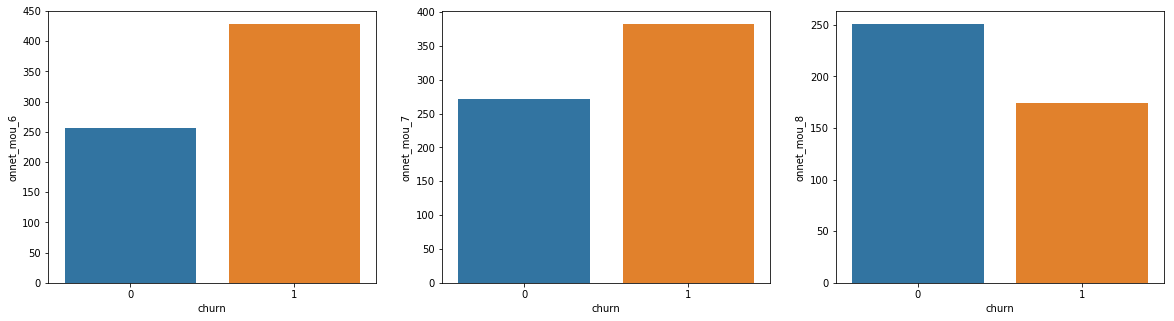

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(tele.groupby('churn')['onnet_mou_6'].mean())
a.columns = [ 'onnet_mou_6']
sns.barplot(a.index , a['onnet_mou_6'] )
plt.subplot(1,3,2)
b  = pd.DataFrame(tele.groupby('churn')['onnet_mou_7'].mean())
b.columns = [ 'onnet_mou_7']
sns.barplot(b.index , b['onnet_mou_7'] )
plt.subplot(1,3,3)
c  = pd.DataFrame(tele.groupby('churn')['onnet_mou_8'].mean())
c.columns = [ 'onnet_mou_8']
sns.barplot(c.index , c['onnet_mou_8'] )
#chrund users have high onnet usage in good period whereas in action period the usage decreases

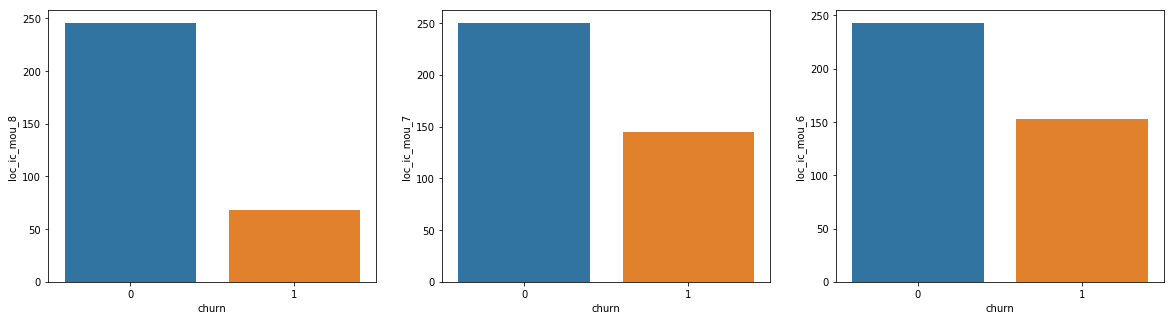

In [0]:

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(tele.groupby('churn')['loc_ic_mou_8'].mean())
a.columns = [ 'loc_ic_mou_8']
sns.barplot(a.index , a['loc_ic_mou_8'] )
plt.subplot(1,3,2)
b  = pd.DataFrame(tele.groupby('churn')['loc_ic_mou_7'].mean())
b.columns = [ 'loc_ic_mou_7']
sns.barplot(b.index , b['loc_ic_mou_7'] )
plt.subplot(1,3,3)
c  = pd.DataFrame(tele.groupby('churn')['loc_ic_mou_6'].mean())
c.columns = [ 'loc_ic_mou_6']
sns.barplot(c.index , c['loc_ic_mou_6'] )
#similar pattern for incoming local calls.

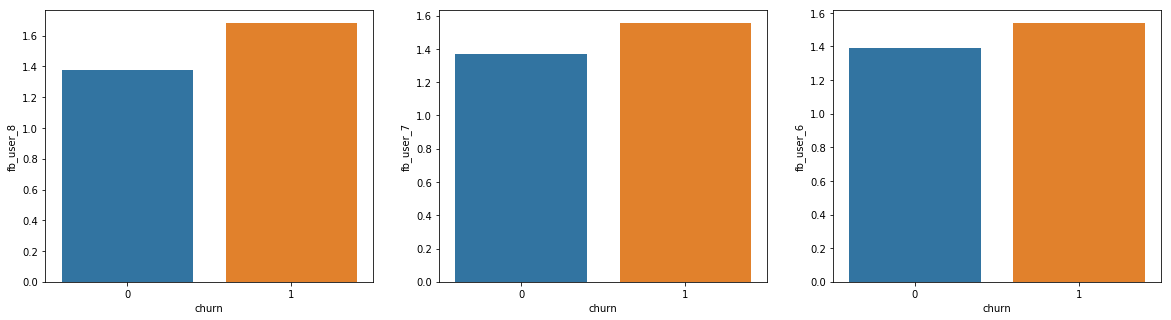

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(tele.groupby('churn')['fb_user_8'].mean())
a.columns = [ 'fb_user_8']
sns.barplot(a.index , a['fb_user_8'] )
plt.subplot(1,3,2)
b  = pd.DataFrame(tele.groupby('churn')['fb_user_7'].mean())
b.columns = ['fb_user_7']
sns.barplot(b.index , b['fb_user_7'] )

plt.subplot(1,3,3)
c = pd.DataFrame(tele.groupby('churn')['fb_user_6'].mean())
c.columns = ['fb_user_6']
sns.barplot(c.index , c['fb_user_6'] )
#bright light: churned users had high fb usage. We CAN FOCUS ON THIS ASPECT

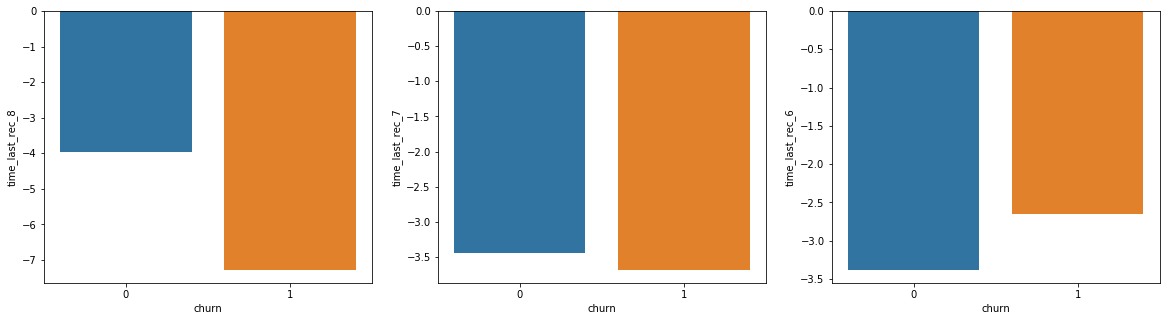

In [0]:


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(tele.groupby('churn')['time_last_rec_8'].mean())
a.columns = [ 'time_last_rec_8']
sns.barplot(a.index , a['time_last_rec_8'] )
plt.subplot(1,3,2)
b  = pd.DataFrame(tele.groupby('churn')['time_last_rec_7'].mean())
b.columns = ['time_last_rec_7']
sns.barplot(a.index , b['time_last_rec_7'] )

plt.subplot(1,3,3)
b  = pd.DataFrame(tele.groupby('churn')['time_last_rec_6'].mean())
b.columns = ['time_last_rec_6']
sns.barplot(a.index , b['time_last_rec_6'] )
#chruned users frequency of recharge also decreases from good perioed to action period

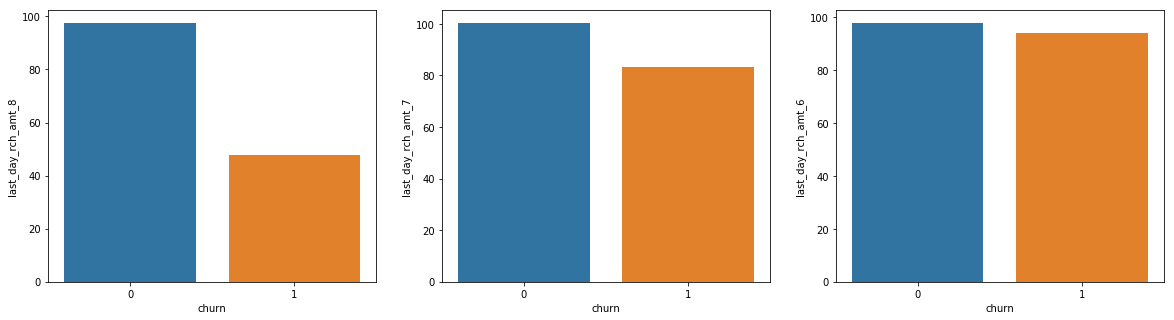

In [0]:

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(tele.groupby('churn')['last_day_rch_amt_8'].mean())
a.columns = [ 'last_day_rch_amt_8']
sns.barplot(a.index , a['last_day_rch_amt_8'] )
plt.subplot(1,3,2)
b  = pd.DataFrame(tele.groupby('churn')['last_day_rch_amt_7'].mean())
b.columns = ['last_day_rch_amt_7']
sns.barplot(a.index , b['last_day_rch_amt_7'] )

plt.subplot(1,3,3)
b  = pd.DataFrame(tele.groupby('churn')['last_day_rch_amt_6'].mean())
b.columns = ['last_day_rch_amt_6']
sns.barplot(a.index , b['last_day_rch_amt_6'] )

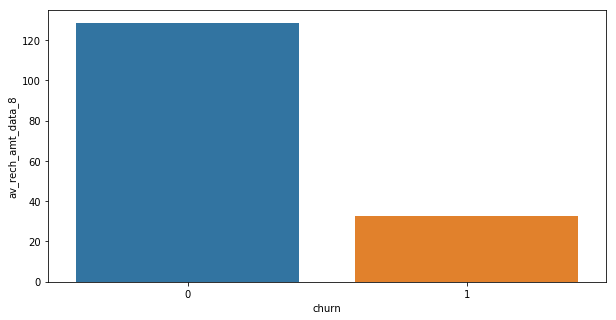

In [0]:

plt.figure(figsize=(10,5))

b  = pd.DataFrame(tele.groupby('churn')['av_rech_amt_data_8'].mean())
b.columns = ['av_rech_amt_data_8']
sns.barplot(b.index , b['av_rech_amt_data_8'] )
#average recharge amount for churned users is significantly low when compared to non churneers. This could be used as an important KPI to identify and manage churns

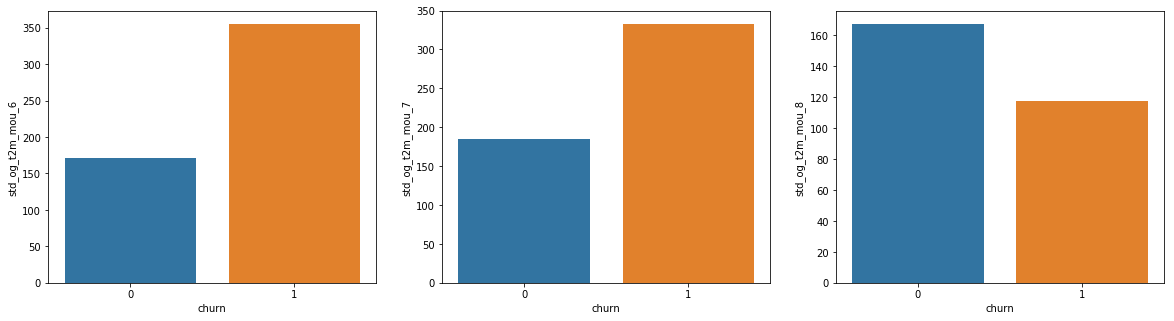

In [0]:


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(tele.groupby('churn')['std_og_t2m_mou_6'].mean())
a.columns = [ 'std_og_t2m_mou_6']
sns.barplot(a.index , a['std_og_t2m_mou_6'] )
plt.subplot(1,3,2)
b  = pd.DataFrame(tele.groupby('churn')['std_og_t2m_mou_7'].mean())
b.columns = ['std_og_t2m_mou_7']
sns.barplot(a.index , b['std_og_t2m_mou_7'] )

plt.subplot(1,3,3)
c  = pd.DataFrame(tele.groupby('churn')['std_og_t2m_mou_8'].mean())
c.columns = ['std_og_t2m_mou_8']
sns.barplot(c.index , c['std_og_t2m_mou_8'] )

#high std to other ntworks can also be a good KPI to identify and manage churners.

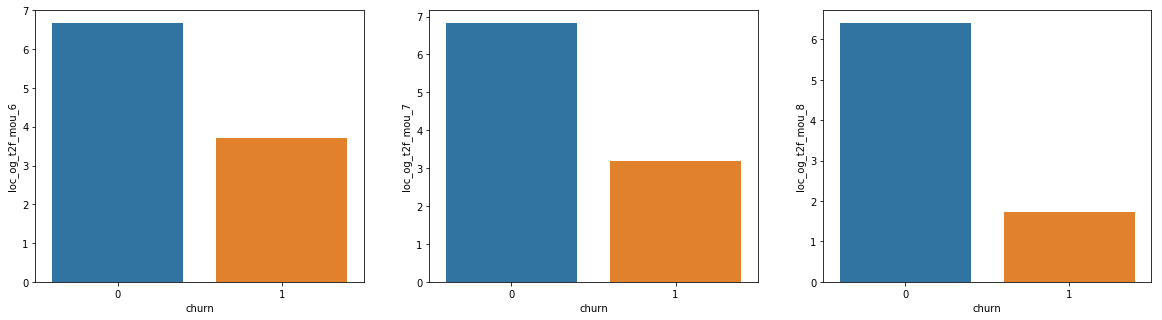

In [0]:


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(tele.groupby('churn')['loc_og_t2f_mou_6'].mean())
a.columns = [ 'loc_og_t2f_mou_6']
sns.barplot(a.index , a['loc_og_t2f_mou_6'] )
plt.subplot(1,3,2)
b  = pd.DataFrame(tele.groupby('churn')['loc_og_t2f_mou_7'].mean())
b.columns = ['loc_og_t2f_mou_7']
sns.barplot(a.index , b['loc_og_t2f_mou_7'] )

plt.subplot(1,3,3)
c  = pd.DataFrame(tele.groupby('churn')['loc_og_t2f_mou_8'].mean())
c.columns = ['loc_og_t2f_mou_8']
sns.barplot(c.index , c['loc_og_t2f_mou_8'] )

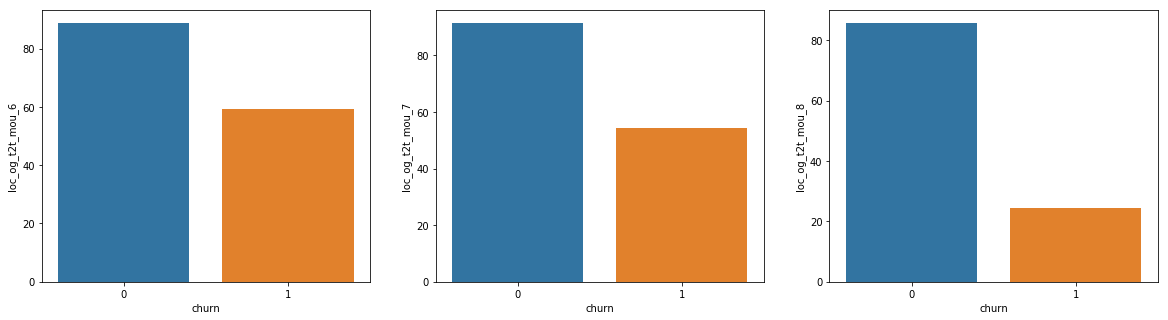

In [0]:


plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
a  = pd.DataFrame(b_treated.groupby('churn')['loc_og_t2t_mou_6'].mean())
a.columns = [ 'loc_og_t2t_mou_6']
sns.barplot(a.index , a['loc_og_t2t_mou_6'] )
plt.subplot(1,3,2)
b  = pd.DataFrame(b_treated.groupby('churn')['loc_og_t2t_mou_7'].mean())
b.columns = ['loc_og_t2t_mou_7']
sns.barplot(b.index , b['loc_og_t2t_mou_7'] )

plt.subplot(1,3,3)
c  = pd.DataFrame(b_treated.groupby('churn')['loc_og_t2t_mou_8'].mean())
c.columns = ['loc_og_t2t_mou_8']
sns.barplot(c.index , c['loc_og_t2t_mou_8'] )

#another decreasing trend for churners, the mean mou for local outgoing in good period is high when compared to action perioed i.e month 8.

# Observations & Recommendations

- Almost for every KPI, there is a decreasing trend, highest at good period and comparatively low at action period.
- Except for FB_USER KPI that maintained more or less constant trend thorugh out. So this suggest company can offer a fixed package with FB or other social media offers.
- Company can monitor the following KPI's, as mentioned earlier, there decreasing trend suggests that user is most likely to churn and to stop this company can offer packages or call him/her to ask for feedback if any problem is been faced by user on this network.
- Its good to be pro-active that reactive.
- Similarly most of the usage based KPI's have  a decreasing trend. Company can monitors the above mentioned KPI's and Can make reactive offers or contact user so that he/she do not churn, which might lead to loss in in revenue. As they are high revenue customers. 
- Based on our analysis, Churned customers also have high number of call outisde the network. So, company can provide the customers with scheme such as cheaper calls to any network or minutes pack to any network.